In [ ]:
from mykalshi import session, transport, formatting, market, events, trading, communications, exchange
import pandas as pd
import numpy as np
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf  
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob
import os

sns.set_theme(style="darkgrid")
%config InlineBackend.figure_format = 'retina'

## 0.0 Preliminary and Brief Analysis

In [2]:
# markets_data = market.get_all_markets()
# markets_df = pd.json_normalize(markets_data)
# filename = 'all_markets_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.csv'
# markets_df.to_csv(filename, index=False)
files = glob.glob("all_markets_*.csv")
filename_to_load = max(files, key=os.path.getctime) if files else None

# Load if found
if filename_to_load:
    markets_df = pd.read_csv(filename_to_load)
    print(f"Loaded: {filename_to_load}")
    display(markets_df)
else:
    print("No matching CSV files found.")

C:\Users\nicco\AppData\Local\Temp\ipykernel_15304\3913729600.py:10: DtypeWarning: Columns (29,31,37,38,39,40,41,42,43,44,45,46,47,48,50,51,55,56,57,58,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,132,133,134,135,136,137,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  markets_df = pd.read_csv(filename_to_load)


Loaded: all_markets_2025-07-11-21-30-55.csv


,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.Joins/Leaves,custom_strike.President,custom_strike.Epidemic Level,custom_strike.Joines/Leaves,custom_strike.Above,custom_strike.Inflation,custom_strike.Unemployment,custom_strike.Expo_Date,custom_strike.Interest Rate,volume_category
0,KXMLSGAME-25JUL16SJDAL-TIE,KXMLSGAME-25JUL16SJDAL,binary,San Jose vs Dallas Winner?,NaN,Tie,Tie,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
1,KXMLSGAME-25JUL16SJDAL-SJ,KXMLSGAME-25JUL16SJDAL,binary,San Jose vs Dallas Winner?,NaN,San Jose,San Jose,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
2,KXMLSGAME-25JUL16SJDAL-DAL,KXMLSGAME-25JUL16SJDAL,binary,San Jose vs Dallas Winner?,NaN,Dallas,Dallas,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
3,KXMLSGAME-25JUL16SDTOR-TOR,KXMLSGAME-25JUL16SDTOR,binary,San Diego FC vs Toronto Winner?,NaN,Toronto,Toronto,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
4,KXMLSGAME-25JUL16SDTOR-TIE,KXMLSGAME-25JUL16SDTOR,binary,San Diego FC vs Toronto Winner?,NaN,Tie,Tie,2025-07-12T00:05:00Z,2027-07-17T02:30:00Z,2025-07-17T05:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140640,TEMP-21-T2.124,TEMP-21,binary,Will 2021 be the **hottest year on record**?,NaN,Above 2.124° C,2.124° C or below,2021-07-02T14:00:00Z,2022-01-10T00:00:00Z,2021-07-02T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000
2140641,HOME-21JUN-T750,HOME-21JUN,binary,"Will new U.S. home sales be above 750,000?",>750K,"Above 750,000","750,000 or below",2021-06-30T14:00:00Z,2021-07-25T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1-10000
2140642,GDP-21JUN30-T6.0,GDP-21JUN30,binary,Will real GDP increase by more than 6%?,>6%,Above 6%,6% or below,2021-06-30T14:00:00Z,2021-07-28T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1-10000
2140643,TRDDEFCN-21MAY-T30,TRDDEFCN-21MAY,binary,Will the US trade deficit in goods with China ...,>$30bn,Above $30 billion,$30 billion or below,2021-06-30T14:00:00Z,2021-07-01T23:00:00Z,2021-06-30T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1-10000


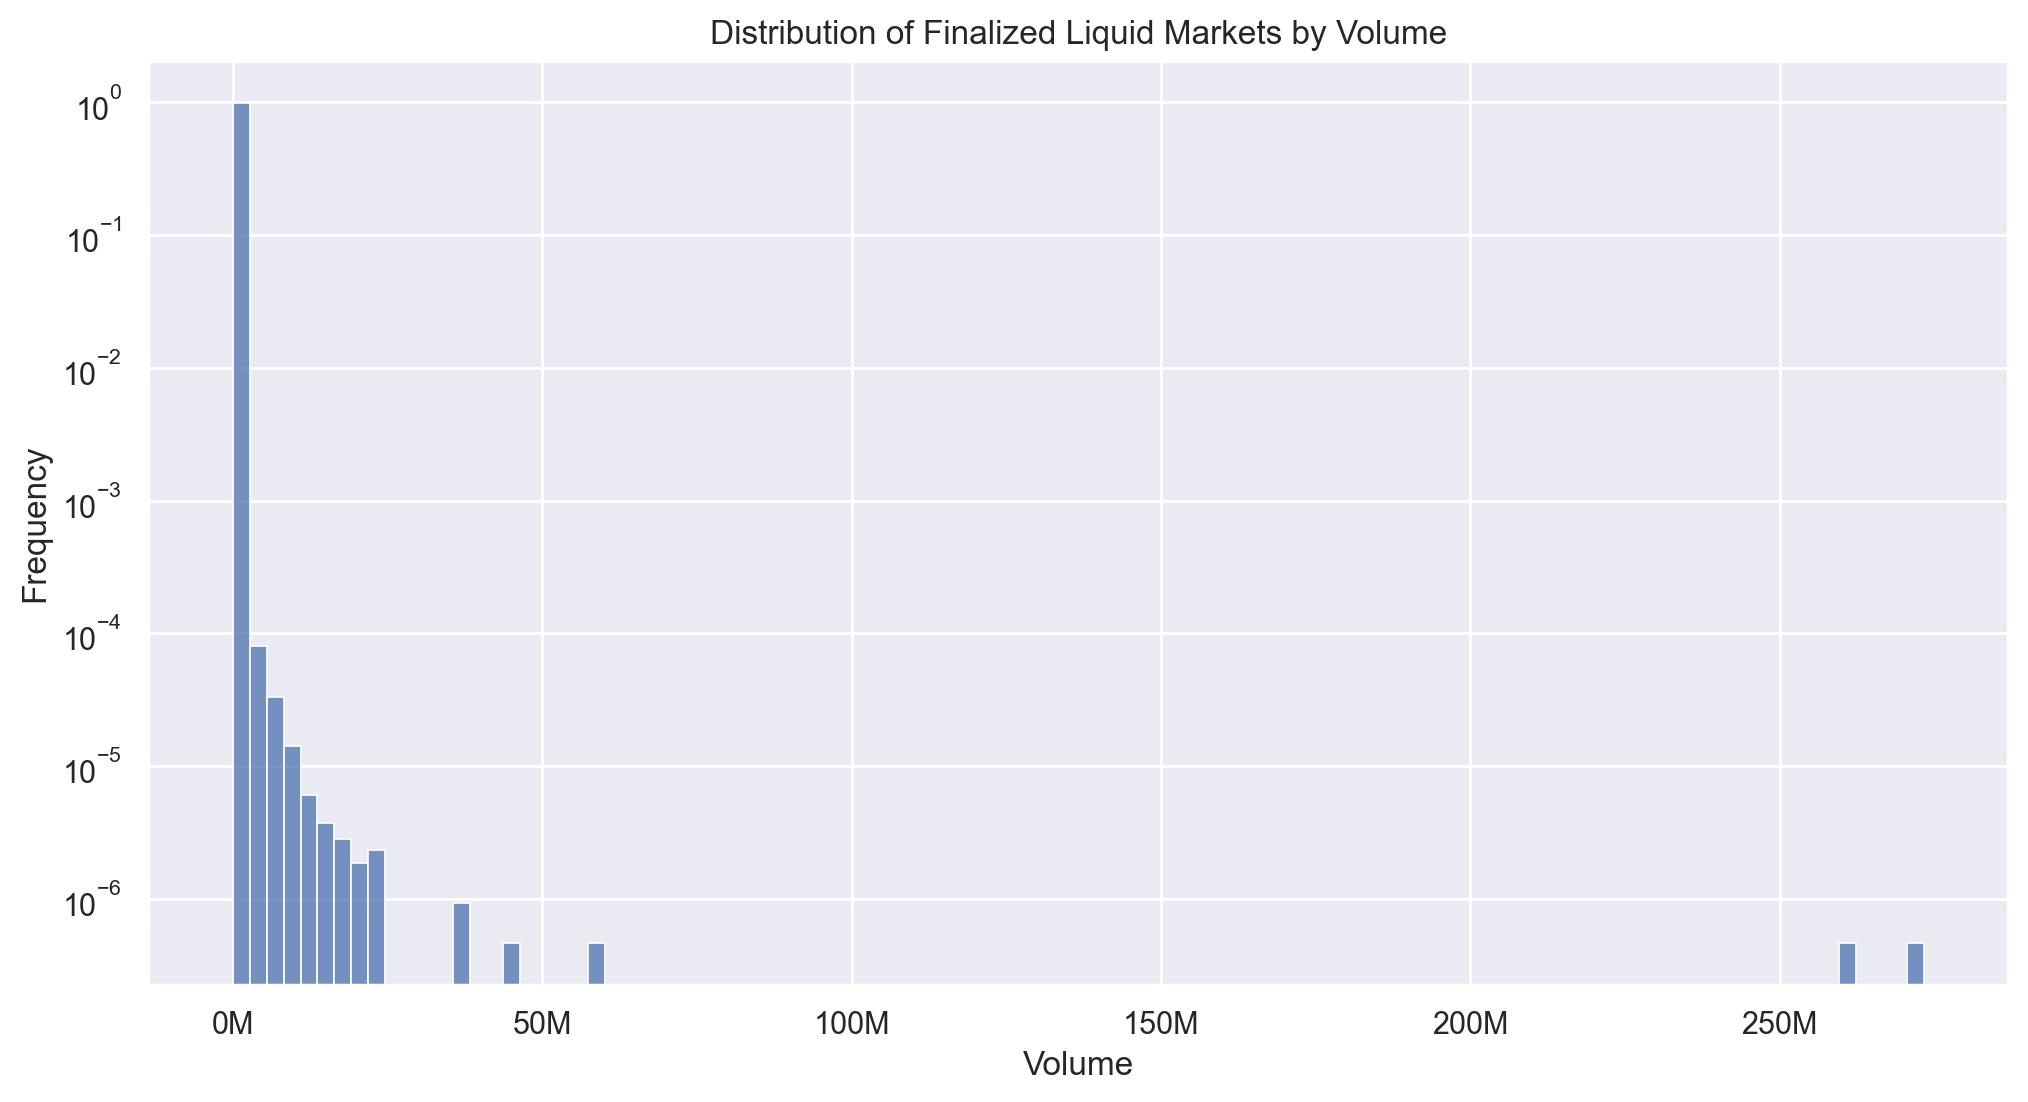

In [3]:
plt.figure(figsize=(12, 6))
sns.histplot(data=markets_df, x='volume', bins=100, kde=False, stat='proportion')
plt.title('Distribution of Finalized Liquid Markets by Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.show()

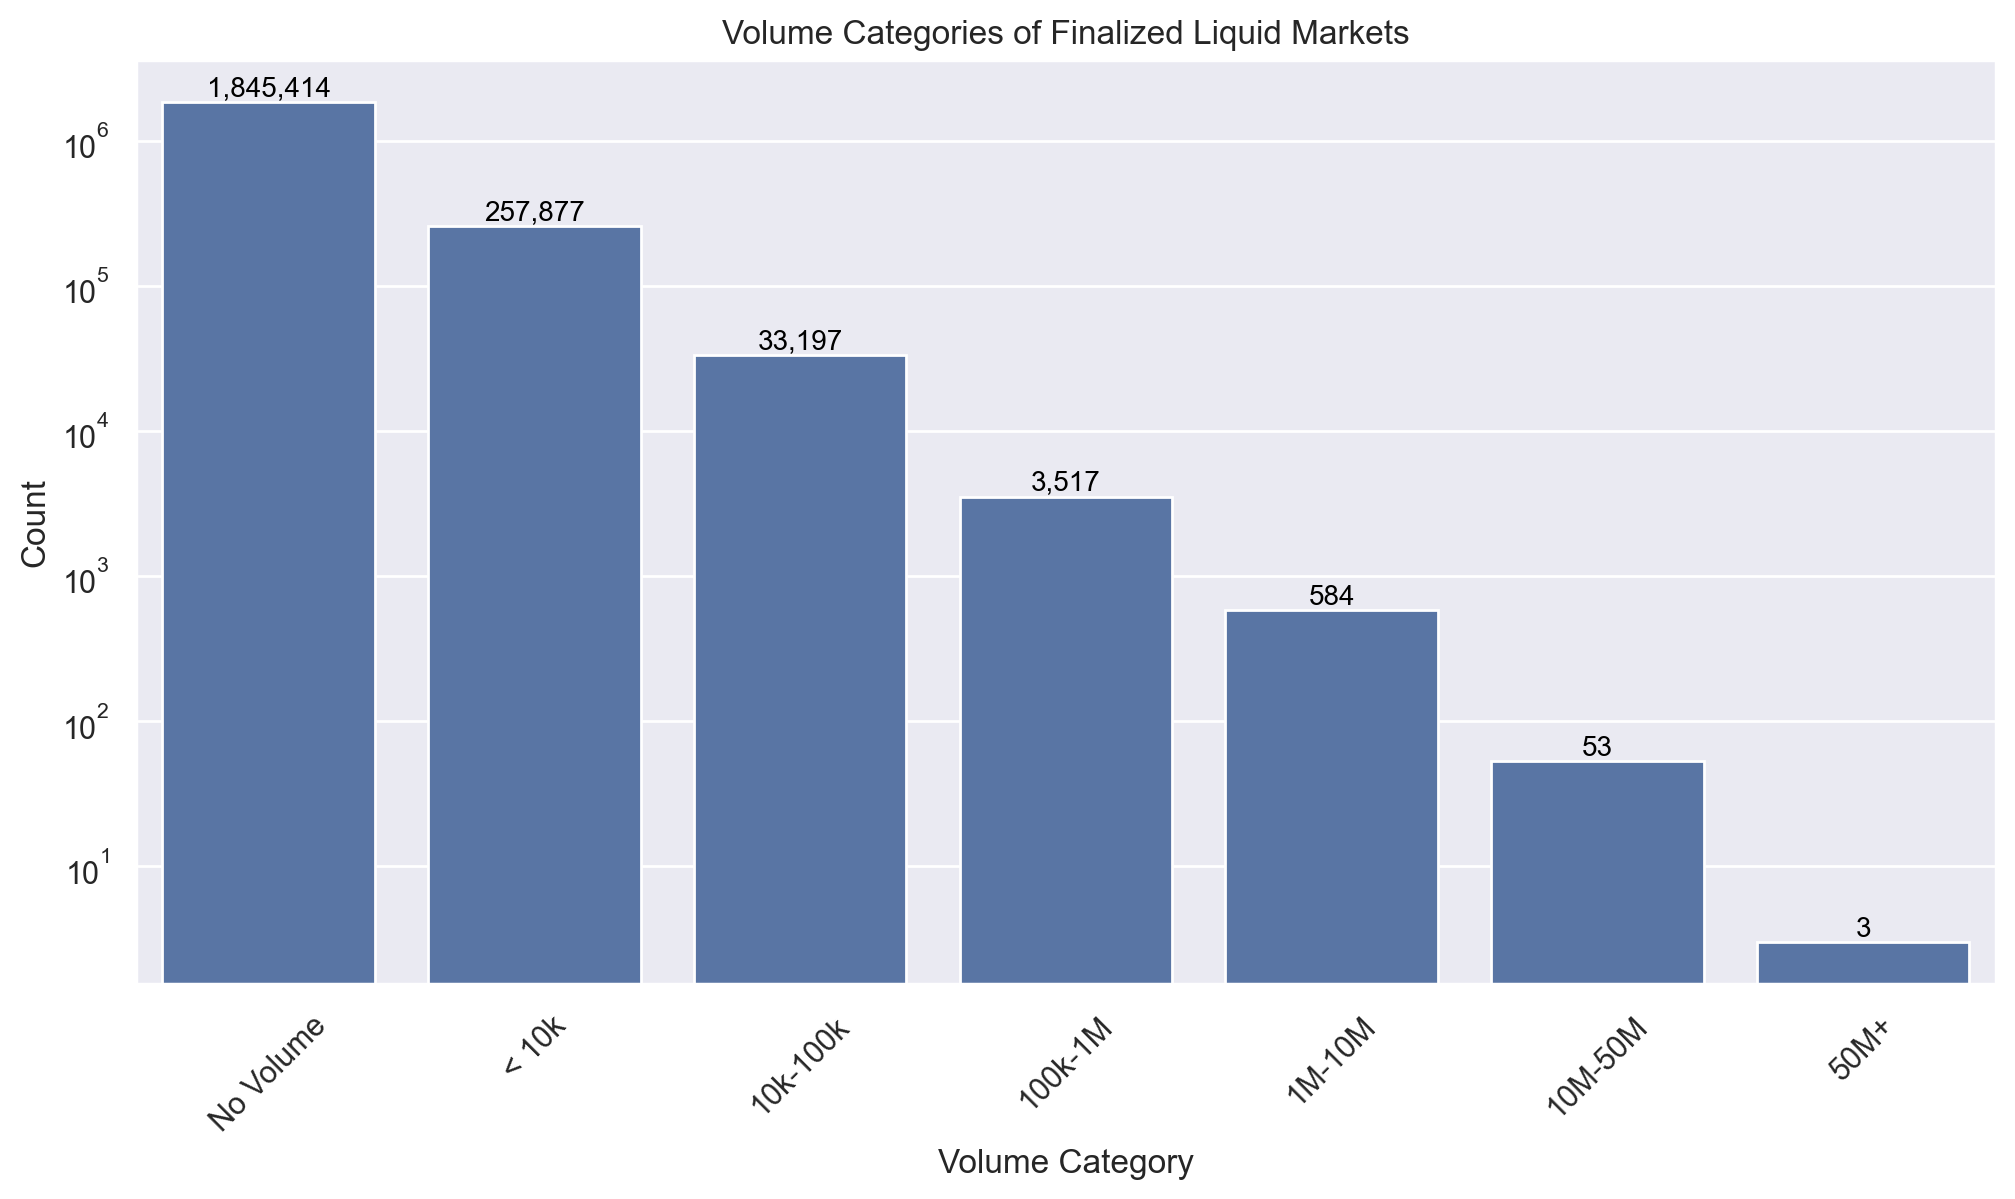

In [4]:
bins = [[0, 0.1], [0.1, 10000], [10000, 100000], [100000, 1000000], [1000000, 10000000], [10000000, 50000000], [50000000, 100000000000]]
bins_labels = ["No Volume", "< 10k", "10k-100k", "100k-1M", "1M-10M", "10M-50M", "50M+"]

def categorize_volume(volume):
    for i, (low, high) in enumerate(bins):
        if low <= volume < high:
            return f"{low}-{high}"
    return "Other"

markets_df['volume_category'] = markets_df['volume'].apply(categorize_volume)
plt.figure(figsize=(12, 6)) 
sns.countplot(data=markets_df, x='volume_category', order=sorted(markets_df['volume_category'].unique()))
# Override the x-tick labels to show ranges
plt.xticks(ticks=range(len(bins_labels)), labels=bins_labels, rotation=45)
# Add printed number on top of each bar (and formate them clearly with "," thousands separator)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black', rotation=0)
plt.title('Volume Categories of Finalized Liquid Markets')
plt.xlabel('Volume Category')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [5]:
fin_liquid_markets = markets_df[(markets_df['status'] == "finalized") & (markets_df['volume'] > 500000)]
fin_liquid_markets = fin_liquid_markets.reset_index(drop=True)
# fin_liquid_markets.to_csv("FinalizedLiquidMarkets.csv", index=False)
fin_liquid_markets

,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.Joins/Leaves,custom_strike.President,custom_strike.Epidemic Level,custom_strike.Joines/Leaves,custom_strike.Above,custom_strike.Inflation,custom_strike.Unemployment,custom_strike.Expo_Date,custom_strike.Interest Rate,volume_category
0,KXATPMATCH-25JUL11SINDJO-DJO,KXATPMATCH-25JUL11SINDJO,binary,Will Novak Djokovic be a winner of the semifin...,NaN,Novak Djokovic,Novak Djokovic,2025-07-09T18:45:00Z,2025-07-11T18:00:53.109089Z,2025-07-11T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
1,KXATPMATCH-25JUL11SINDJO-SIN,KXATPMATCH-25JUL11SINDJO,binary,Will Jannik Sinner be a winner of the semifina...,NaN,Jannik Sinner,Jannik Sinner,2025-07-09T18:45:00Z,2025-07-11T18:00:53.109089Z,2025-07-11T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
2,KXWTAMATCH-25JUL10BENSWI-SWI,KXWTAMATCH-25JUL10BENSWI,binary,Will Iga Swiatek be a winner of the semifinal ...,NaN,Iga Swiatek,Iga Swiatek,2025-07-09T15:05:00Z,2025-07-10T17:15:19.053047Z,2025-07-10T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
3,KXWTAMATCH-25JUL10BENSWI-BEN,KXWTAMATCH-25JUL10BENSWI,binary,Will Belinda Bencic be a winner of the semifin...,NaN,Belinda Bencic,Belinda Bencic,2025-07-09T15:05:00Z,2025-07-10T17:15:19.053047Z,2025-07-10T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
4,KXATPMATCH-25JUL11FRIALC-FRI,KXATPMATCH-25JUL11FRIALC,binary,Will Taylor Fritz be a winner of the semifinal...,NaN,Taylor Fritz,Taylor Fritz,2025-07-08T18:05:00Z,2025-07-11T15:30:29.544767Z,2025-07-11T15:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000-10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,FED-23MAY-T5.00,FED-23MAY,binary,Will the upper bound of the federal funds rate...,>5.00% :: 25+ bp hike,Above 5.00%,5.00% or below,2022-11-02T15:15:00Z,2023-05-03T17:55:00Z,2023-05-03T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000
961,FED-23MAR-T5.00,FED-23MAR,binary,Will the upper bound of the federal funds rate...,>5.00% :: 50+ bp hike,Above 5.00%,5.00% or below,2022-10-17T14:00:00Z,2023-03-22T17:55:00Z,2023-03-22T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000
962,FED-23MAR-T4.75,FED-23MAR,binary,Will the upper bound of the federal funds rate...,>4.75% :: 25+ bp hike,Above 4.75%,4.75% or below,2022-10-17T14:00:00Z,2023-03-22T17:55:00Z,2023-03-22T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000
963,FED-22SEP-T3.00,FED-22SEP,binary,Will the federal funds rate be above 3.00% fol...,>3.00% :: 75bp hike or greater,Above 3.00%,3.00% or below,2022-06-14T15:15:00Z,2022-09-21T17:55:00Z,2022-09-27T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000-1000000


In [6]:
open_mkts = pd.json_normalize(market.get_all_markets(status="open", batch_size=100))
open_mkts

,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.House Winner,custom_strike.President Winner,custom_strike.Senate Winner,custom_strike.Disease,custom_strike.Chemical,custom_strike.Cryptocurrency,custom_strike.Chamber of Congress,custom_strike.Public Health Emergency/Pandemic,fee_waiver_expiration_time,custom_strike.Chart
0,KXATPMATCH-25JUL17PASKYM-KYM,KXATPMATCH-25JUL17PASKYM,binary,Will Jerome Kym be a winner of the round of 16...,,Jerome Kym,Jerome Kym,2025-07-15T16:05:00Z,2027-07-17T08:30:00Z,2025-07-17T11:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KXATPMATCH-25JUL17PASKYM-PAS,KXATPMATCH-25JUL17PASKYM,binary,Will Francesco Passaro be a winner of the roun...,,Francesco Passaro,Francesco Passaro,2025-07-15T16:05:00Z,2027-07-17T08:30:00Z,2025-07-17T11:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KXSENATETXD-26-JTAL,KXSENATETXD-26,binary,Wil James Talarico be the Democratic nominee f...,,James Talarico,James Talarico,2025-07-15T15:45:43Z,2026-11-03T15:00:00Z,2026-11-03T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KXGOVGANOMD-26-JEST,KXGOVGANOMD-26,binary,Wil Jason Esteves be the Democratic nominee fo...,,Jason Esteves,Jason Esteves,2025-07-15T15:45:15Z,2026-11-03T15:00:00Z,2026-11-03T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KXWTAMATCH-25JUL16FETCRI-FET,KXWTAMATCH-25JUL16FETCRI,binary,Will Jana Fett be a winner of the round of 16 ...,,Jana Fett,Jana Fett,2025-07-15T15:45:00Z,2027-07-16T07:30:00Z,2025-07-16T10:30:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,MSFTCEO-25-SG,MSFTCEO-25,binary,Will Scott Guthrie be the next Microsoft CEO?,Scott Guthrie,Scott Guthrie,Not Scott Guthrie,2023-11-29T01:16:00Z,2026-01-01T04:59:00Z,2026-01-01T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13165,MSFTCEO-25-SA,MSFTCEO-25,binary,Will Sam Altman be the next Microsoft CEO?,Sam Altman,Sam Altman,Not Sam Altman,2023-11-29T01:16:00Z,2026-01-01T04:59:00Z,2026-01-01T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13166,MSFTCEO-25-BS,MSFTCEO-25,binary,Will Brad Smith be the next Microsoft CEO?,Brad Smith,Brad Smith,Not Brad Smith,2023-11-29T01:16:00Z,2026-01-01T04:59:00Z,2026-01-01T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13167,APPLEPORT-25DEC31,APPLEPORT-25DEC31,binary,Will Apple announce a portless phone by Dec 31...,By Dec 31 2025,Reveals,Doesn't reveal,2023-10-25T14:00:00Z,2026-01-01T04:59:00Z,2025-12-31T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.0 Presidential Election

In [7]:
out = events.event_info("PRES-2024")
out["markets"]#, out["event_info"]

,market_ticker,yes_sub_title,range,strike_type,last_price,yes_bid,yes_ask,no_bid,no_ask,volume,open_time,close_time,status,rules_primary
0,PRES-2024-KH,Kamala Harris,:: or another Democrat,custom,1,0,1,99,100,273312857,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Kamala Harris or another representative of ...
1,PRES-2024-DJT,Donald Trump,:: or another Republican,None,99,99,100,0,1,262334207,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Donald Trump or another representative of t...
2,PRES-2024-RFK,Robert F. Kennedy Jr.,:: or another We the People nominee,custom,1,0,1,99,100,224361,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Robert F. Kennedy Jr. or another representa...
3,PRES-2024-JS,Jill Stein,:: or another Green Party nominee,custom,1,0,1,99,100,40394,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Jill Stein or another representative of the...
4,PRES-2024-CO,Chase Oliver,:: or another Libertarian,custom,1,0,1,99,100,20834,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Chase Oliver or another representative of t...
5,PRES-2024-CW,Cornel West,:: or another Justice for All nominee,custom,1,0,1,99,100,16290,2024-10-04T12:15:00Z,2025-01-20T17:03:48.078202Z,finalized,If Cornel West or another representative of th...


In [8]:
results = {}

for mkt in out["markets"]["market_ticker"].values:
    cs_df = market.candlesticks_to_df(market.get_full_market(series_ticker="KXLLM1", ticker=mkt, period_interval='h', end_ts='11/10/2024'))[['end_period', 'yes_ask_close', 'yes_bid_close', 'volume']]
    
    cs_df['end_period'] = pd.to_datetime(cs_df['end_period'])
    cs_df['date'] = cs_df['end_period']
    cs_df['midval'] = (cs_df['yes_ask_close'] + cs_df['yes_bid_close']) / 2
    cs_df['ask'] = cs_df['yes_ask_close']
    cs_df['bid'] = cs_df['yes_bid_close']
    cs_df = cs_df.drop(columns=['yes_ask_close', 'yes_bid_close', 'end_period'])
    cs_df.set_index('date', inplace=True)
    title = out["markets"].loc[out["markets"]["market_ticker"] == mkt, "yes_sub_title"].values[0]
    # range = parse_range_string(range)

    results[title] = cs_df

# Step 1: Compute the global index (union of all datetime indices)
all_indices = sorted(set().union(*[df.index for df in results.values()]))
global_index = pd.DatetimeIndex(all_indices)

# Step 2: Build the full DataFrame with aligned index
results_df = pd.DataFrame(index=global_index)

# Step 3: Merge all time series, aligned on the global index
for title, df in results.items():
    df = df.groupby(df.index).mean()  # or .sum(), or use .duplicated() line

    renamed_df = df.rename(columns={
        'midval': f'{title}_midval',
        'ask': f'{title}_ask',
        'bid': f'{title}_bid',
        'volume': f'{title}_volume'
    })

    renamed_df = renamed_df.reindex(global_index)
    results_df = pd.concat([results_df, renamed_df], axis=1)

# results_df.ffill(inplace=True)
for col in results_df.columns:
    if '_midval' in col:
        vol_col = col.replace('_midval', '_volume')
        filled_series = results_df[col].copy()
        volume_series = results_df[vol_col]

        for i in range(1, len(filled_series)):
            if pd.isna(filled_series.iloc[i]) and pd.notna(volume_series.iloc[i-1]) and volume_series.iloc[i-1] > 200:
                filled_series.iloc[i] = filled_series.iloc[i - 1]

        results_df[col] = filled_series

# Step 4: Final computed columns
results_df['Vol'] = results_df[[col for col in results_df.columns if '_volume' in col]].sum(axis=1)
results_df['Tot'] = results_df[[col for col in results_df.columns if '_midval' in col]].sum(axis=1)

results_df.index.name = 'date'
results_df


,Kamala Harris_volume,Kamala Harris_midval,Kamala Harris_ask,Kamala Harris_bid,Donald Trump_volume,Donald Trump_midval,Donald Trump_ask,Donald Trump_bid,Robert F. Kennedy Jr._volume,Robert F. Kennedy Jr._midval,...,Chase Oliver_volume,Chase Oliver_midval,Chase Oliver_ask,Chase Oliver_bid,Cornel West_volume,Cornel West_midval,Cornel West_ask,Cornel West_bid,Vol,Tot
date,,,,,,,,,,,,,,,,,,,,,
2024-10-04 13:00:00,24083.0,50.5,51.0,50.0,39835.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.5,1.0,0.0,63919.0,100.5
2024-10-04 14:00:00,4330.0,50.5,51.0,50.0,3390.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7720.0,100.0
2024-10-04 15:00:00,6199.0,50.5,51.0,50.0,3382.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9581.0,100.0
2024-10-04 16:00:00,2814.0,50.5,51.0,50.0,3804.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6618.0,100.0
2024-10-04 17:00:00,8601.0,50.5,51.0,50.0,21784.0,49.5,50.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30385.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-09 20:00:00,21514.0,1.5,2.0,1.0,54705.0,97.5,98.0,97.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76219.0,99.0
2024-11-09 21:00:00,56499.0,1.5,2.0,1.0,77001.0,97.5,98.0,97.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133500.0,99.0
2024-11-09 22:00:00,94528.0,1.5,2.0,1.0,41228.0,97.5,98.0,97.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135756.0,99.0


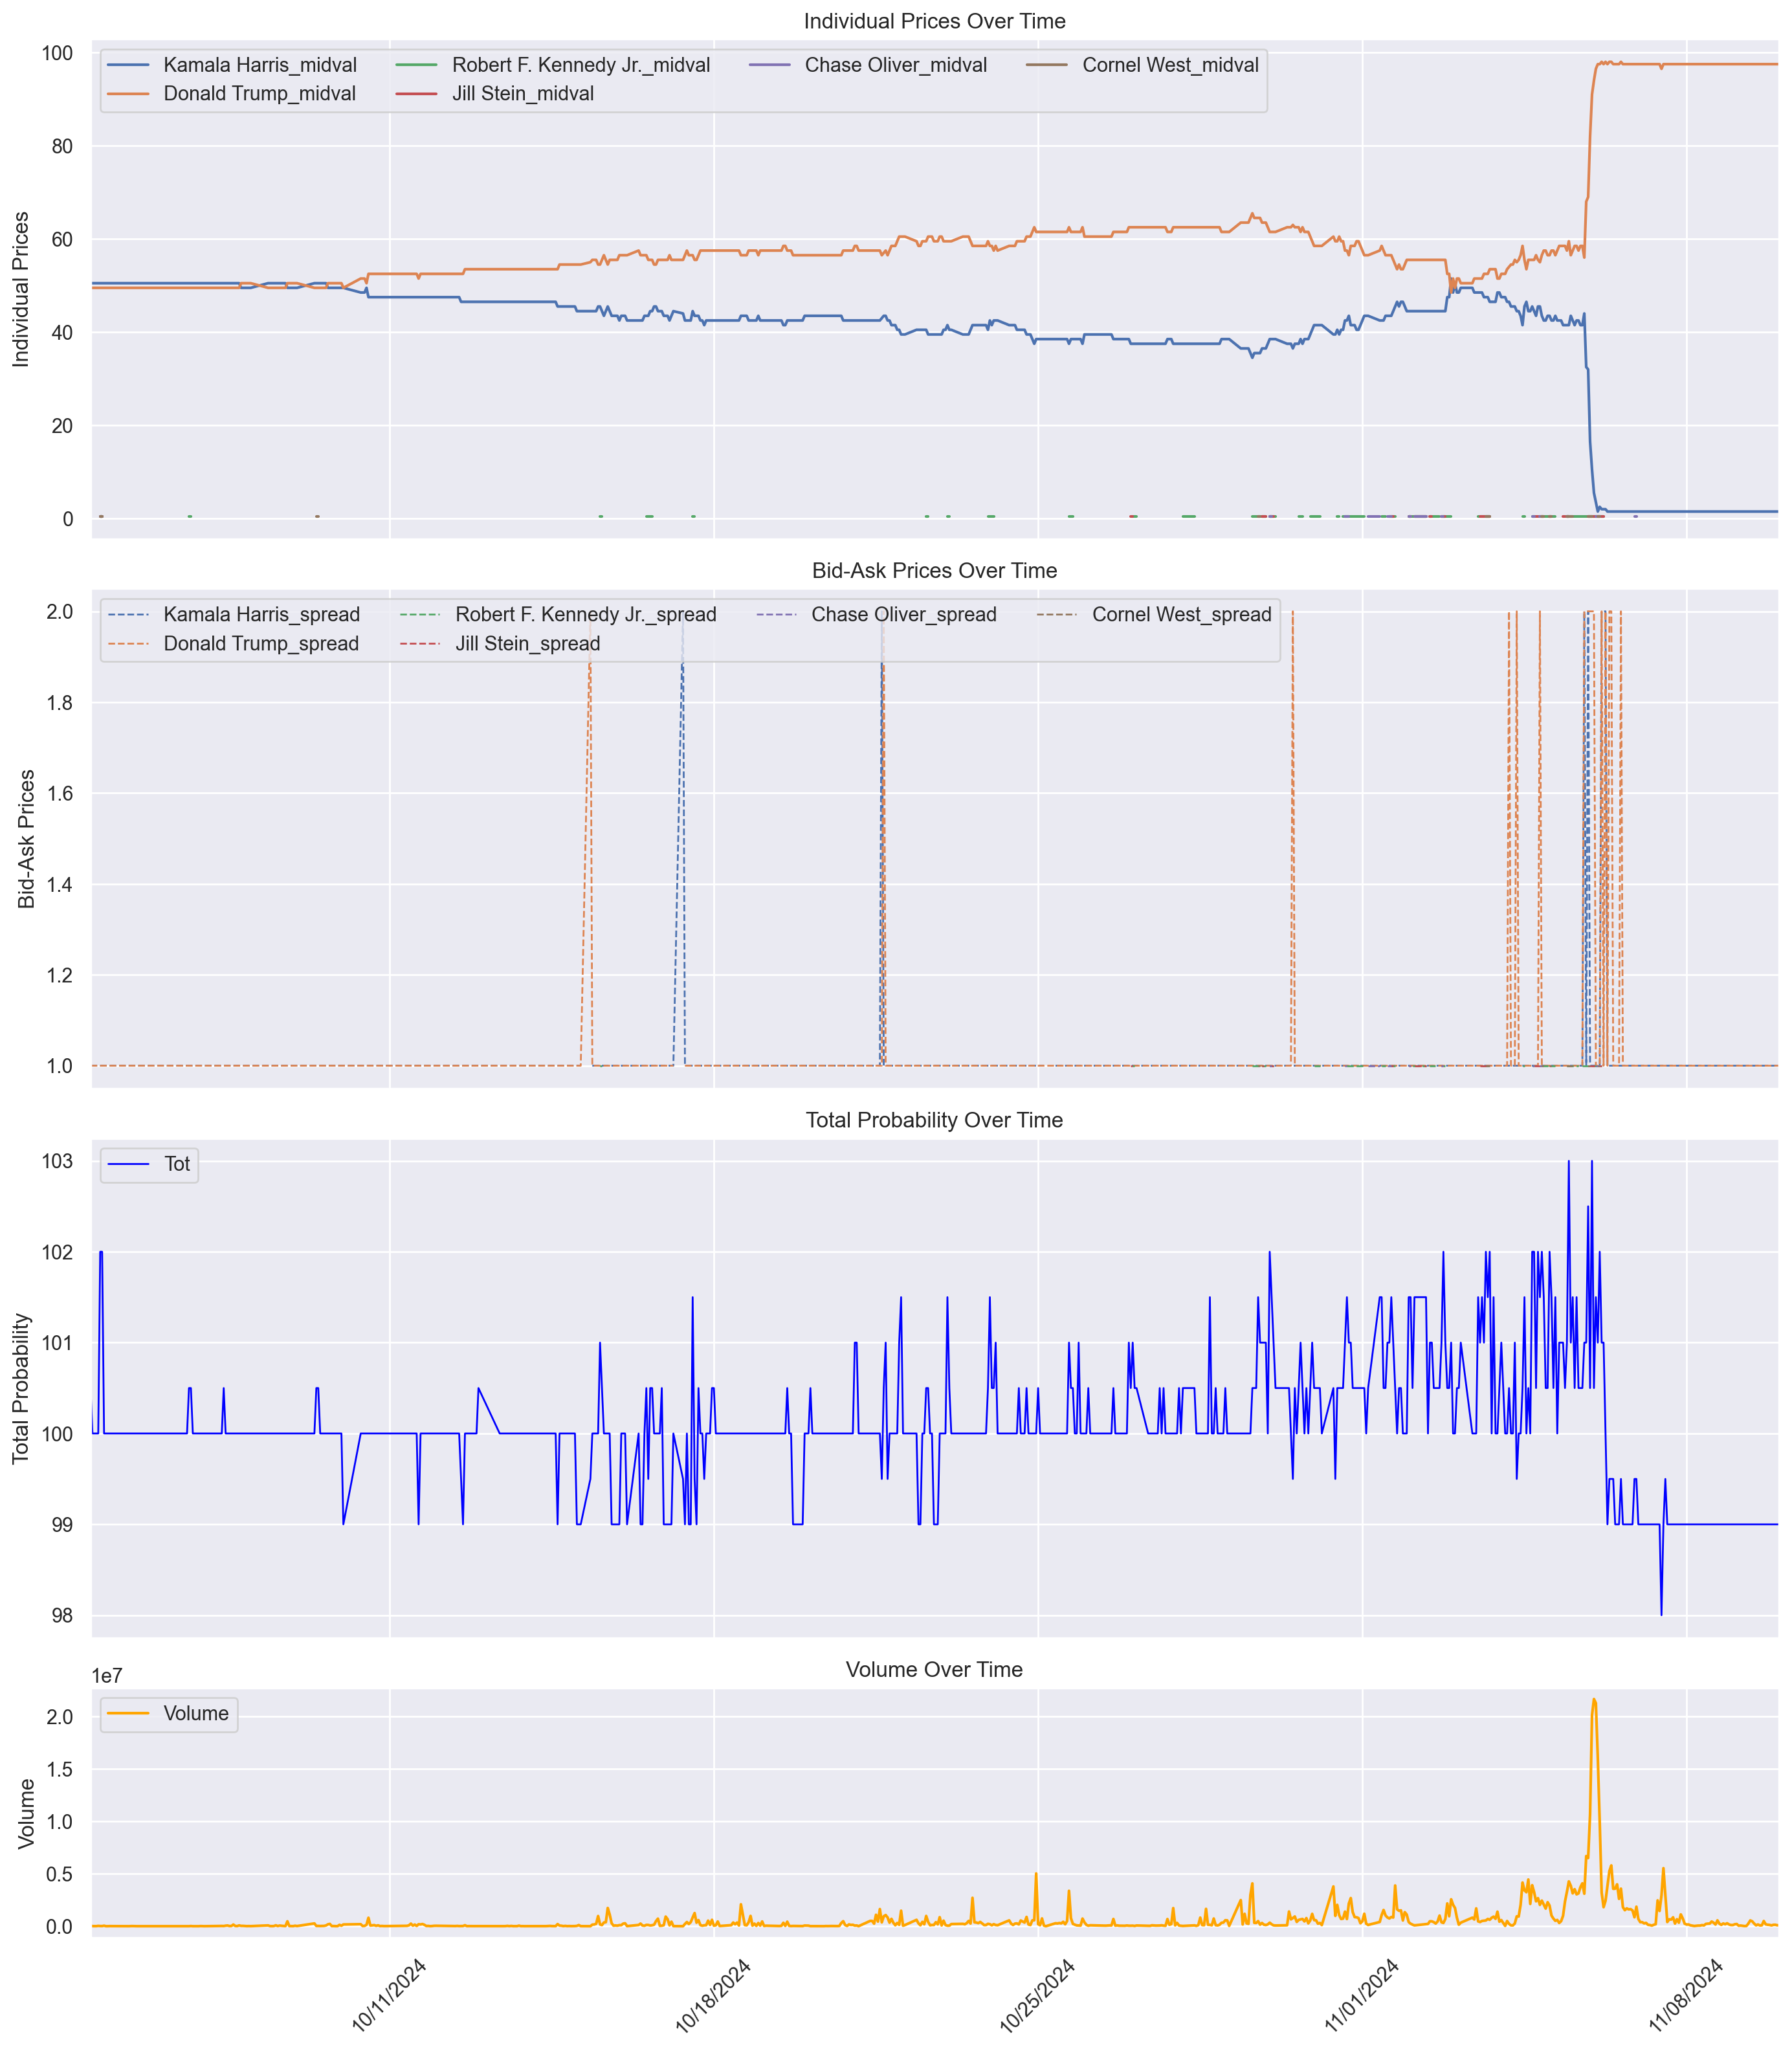

In [9]:
plot_df = results_df.reset_index()

# Identify price columns (all columns except 'date', 'Tot', and 'Vol')
price_columns = [col for col in plot_df.columns if "_midval" in col]

# Create a figure with 3 subplots, making the top two price plots the same size
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(14, 16), 
                                    gridspec_kw={'height_ratios': [2, 2, 2, 1]}, 
                                    sharex=True)

# Plot 1: Individual Prices
for col in price_columns:
    ax1.plot(plot_df['date'], plot_df[col], linewidth=1.5, label=col)
ax1.set_ylabel('Individual Prices')
ax1.set_title('Individual Prices Over Time')
ax1.legend(loc='upper left', ncol=min(4, len(price_columns)))
ax1.grid(True)
plt.setp(ax1.get_xticklabels(), visible=False)

# Plot 2: Bid-Ask Prices
for col in price_columns:
    ax2.plot(plot_df['date'], plot_df[col.replace('_midval', '_ask')] - plot_df[col.replace('_midval', '_bid')], linestyle='--', linewidth=1, label=col.replace('_midval', '_spread'))
    # ax2.plot(plot_df['date'], plot_df[col.replace('_midval', '_bid')], linestyle=':', linewidth=1, label=col.replace('_midval', '_bid'))
ax2.set_ylabel('Bid-Ask Prices')
ax2.set_title('Bid-Ask Prices Over Time')
ax2.legend(loc='upper left', ncol=min(4, len(price_columns) * 2))
ax2.grid(True)
plt.setp(ax2.get_xticklabels(), visible=False)

# selected_outcome = 'Donald Trump'

# ax2.plot(plot_df['date'], plot_df[selected_outcome + '_ask'], linestyle='--', linewidth=1, label=selected_outcome + '_ask')
# ax2.plot(plot_df['date'], plot_df[selected_outcome + '_bid'], linestyle=':', linewidth=1, label=selected_outcome + '_bid')
# ax2.set_ylabel('Bid-Ask Prices')
# ax2.set_title('Bid-Ask Prices Over Time')
# ax2.legend(loc='upper left', ncol=min(4, len(price_columns) * 2))
# ax2.grid(True)
# plt.setp(ax2.get_xticklabels(), visible=False)

# Plot 3: Total Probability
ax3.plot(plot_df['date'], plot_df['Tot'], color='blue', linewidth=1, label='Tot')
ax3.set_ylabel('Total Probability')
ax3.set_title('Total Probability Over Time')
ax3.legend(loc='upper left')
ax3.grid(True)
plt.setp(ax3.get_xticklabels(), visible=False)

# Calculate appropriate width for bars
if plot_df.shape[0] > 1:
    time_diff = (plot_df['date'].iloc[1] - plot_df['date'].iloc[0]).total_seconds()
    width_in_days = (time_diff / (24 * 60 * 60)) * 0.8
else:
    width_in_days = 0.01

# Plot 4: Volume
ax4.plot(plot_df['date'], plot_df['Vol'], color='orange', label='Volume')
ax4.set_ylabel('Volume')
ax4.set_title('Volume Over Time')
ax4.legend(loc='upper left')
ax4.grid(True)

# Format only the bottom x-axis with more compact labels
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

# Adjust the x-axis limits to match your data range
date_min = plot_df['date'].min()
date_max = plot_df['date'].max()
ax4.set_xlim(date_min, date_max)

plt.tight_layout()
plt.show()

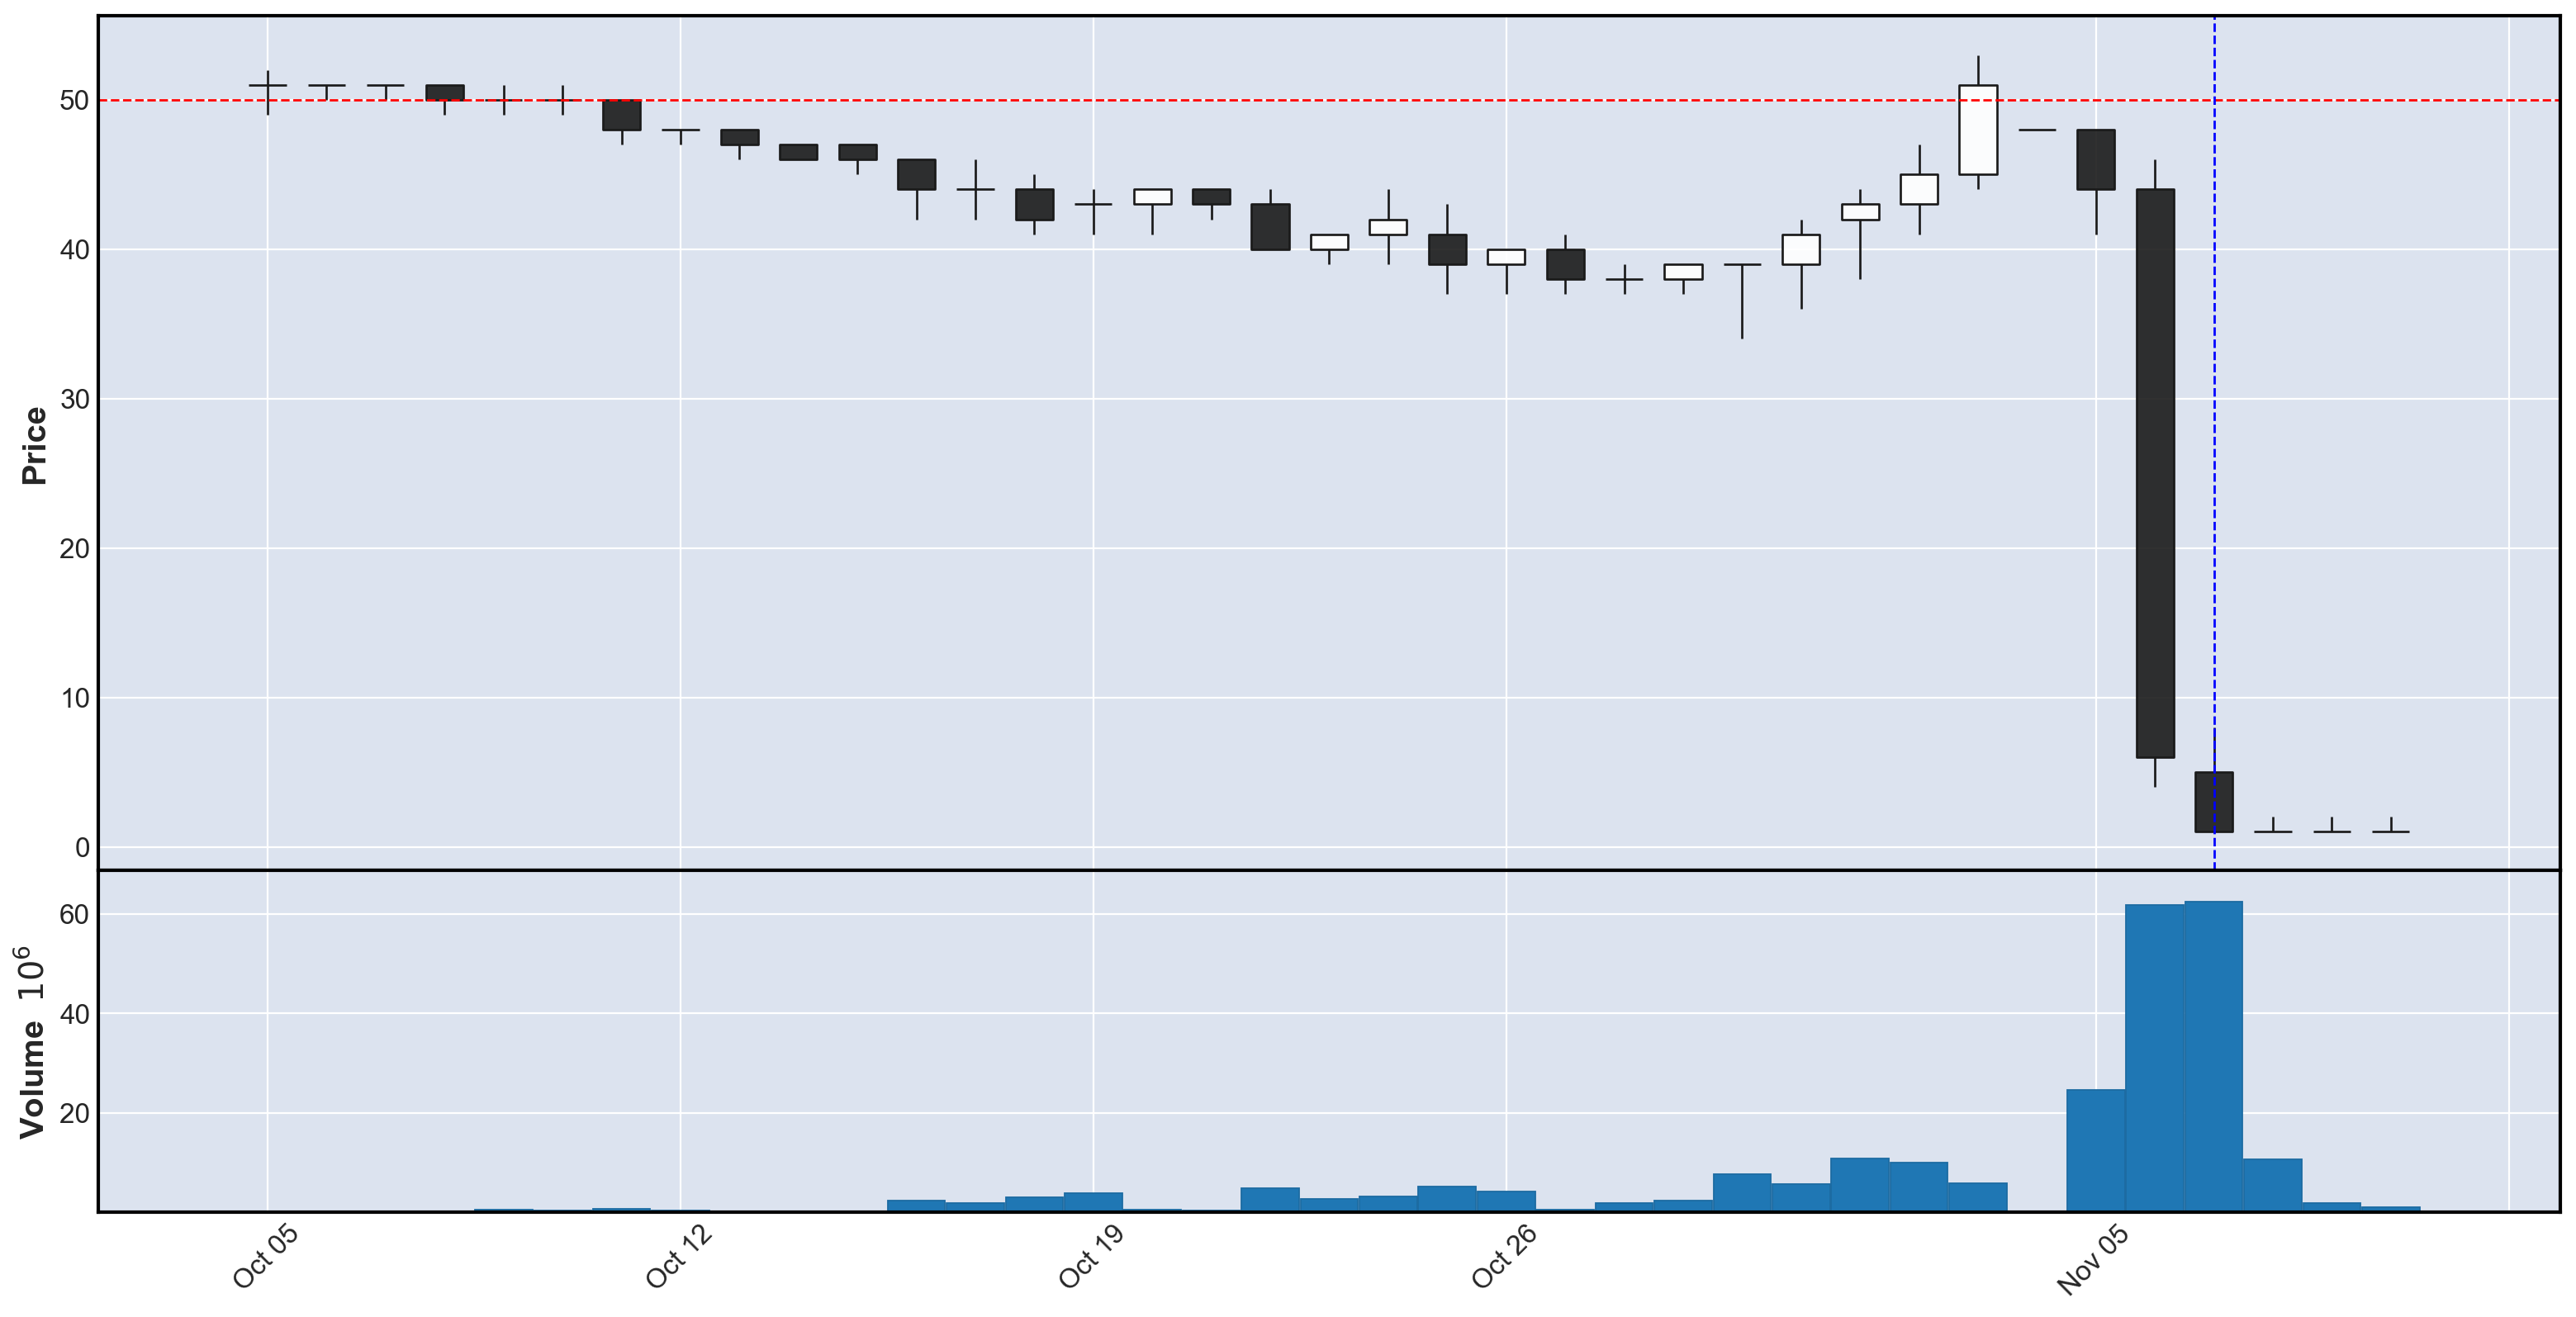

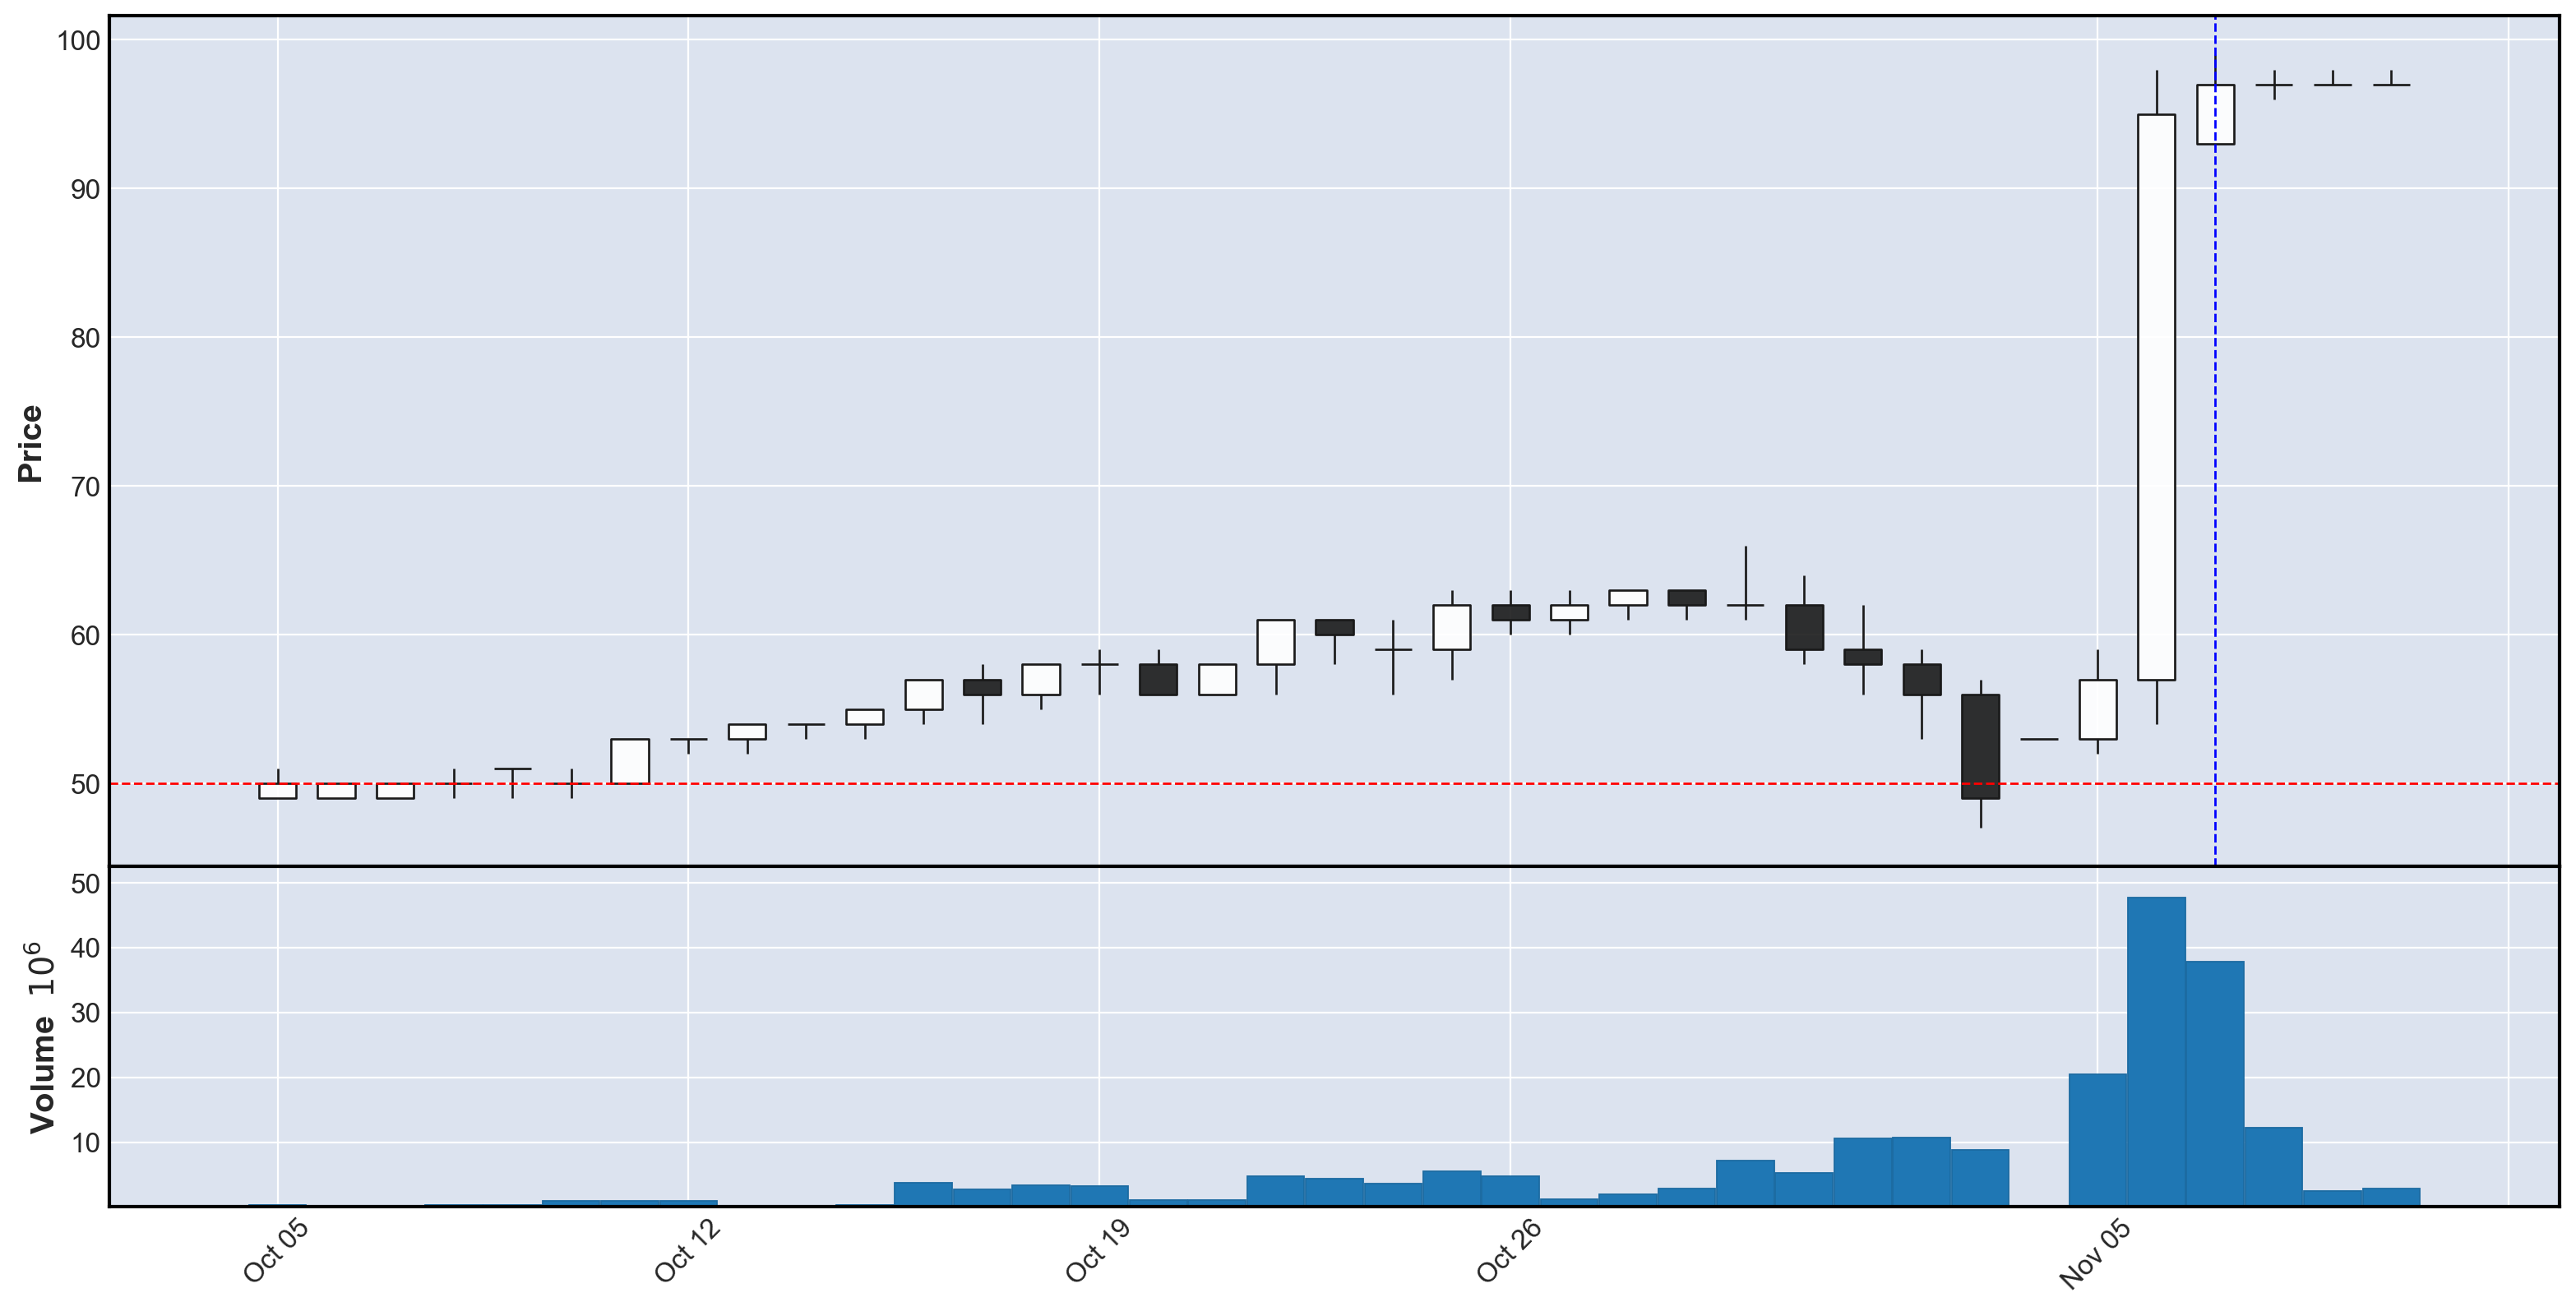

In [ ]:
pres_djt_data = market.get_full_market(
    series_ticker="PRES",
    ticker="PRES-2024-DJT",
    # start_ts="04/01/2024",
    end_ts="11/10/2024",
    period_interval=
)

pres_kh_data = market.get_full_market(
    series_ticker="PRES",
    ticker="PRES-2024-KH",
    # start_ts="04/01/2024",
    end_ts="11/10/2024",
    period_interval='d'
)
djt_df = market.candlesticks_to_df(pres_djt_data)
kh_df = market.candlesticks_to_df(pres_kh_data)

djt_candlestick_df = market.build_candlestick(pres_djt_data)
kh_candlestick_df = market.build_candlestick(pres_kh_data)

fig, axes = mpf.plot(
    kh_candlestick_df,
    volume=True,
    figratio=(20, 10),
    figscale=1.8,
    show_nontrading=False,
    mav=3*24,
    returnfig=True,
    type='candle',
)

# Set y-axis limits for the price chart (first axes object)
# axes[0].set_ylim(0, 60)  # customize as needed

# Add a horizontal line at y=50
axes[0].axhline(y=50, color='red', linestyle='--', linewidth=1)
axes[0].axvline(x=datetime.strptime('Feb 3 1970 00:00', '%b %d %Y %H:%M'), color='blue', linestyle='--', linewidth=1) # Don't know why date is fucked up here


fig, axes = mpf.plot(
    djt_candlestick_df,
    volume=True,
    figratio=(20, 10),
    figscale=1.8,
    show_nontrading=False,
    mav=3*24,
    returnfig=True,
    type='candle',
)

# Add a horizontal line at y=50
axes[0].axhline(y=50, color='red', linestyle='--', linewidth=1)
axes[0].axvline(x=datetime.strptime('Feb 3 1970 00:00', '%b %d %Y %H:%M'), color='blue', linestyle='--', linewidth=1) # Don't know why date is fucked up here

## 2.0 LOB Tools

In [11]:
orderbook = market.get_market_orderbook(ticker="KXFEDDECISION-25JUL-C25")["orderbook"]
yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

print("\nBids:")
for price, qty in yes_bids:
    print(f"  YES @ {price}¢ × {qty} contracts")

print("Asks:")
for price, qty in yes_asks:
    print(f"  YES @ {price}¢ × {qty} contracts")


Bids:
  YES @ 1¢ × 2013748 contracts
  YES @ 2¢ × 1108340 contracts
  YES @ 3¢ × 509179 contracts
Asks:
  YES @ 4¢ × 1184138 contracts
  YES @ 5¢ × 698225 contracts
  YES @ 6¢ × 152867 contracts
  YES @ 7¢ × 4250 contracts
  YES @ 8¢ × 5096 contracts
  YES @ 9¢ × 350 contracts
  YES @ 10¢ × 161 contracts
  YES @ 12¢ × 18344 contracts
  YES @ 14¢ × 234 contracts
  YES @ 15¢ × 385 contracts
  YES @ 16¢ × 599 contracts
  YES @ 17¢ × 1069 contracts
  YES @ 18¢ × 1261 contracts
  YES @ 19¢ × 1625 contracts
  YES @ 20¢ × 1902 contracts
  YES @ 21¢ × 2095 contracts
  YES @ 25¢ × 135 contracts
  YES @ 27¢ × 5000 contracts
  YES @ 28¢ × 500 contracts
  YES @ 35¢ × 1 contracts
  YES @ 43¢ × 114 contracts
  YES @ 44¢ × 500 contracts
  YES @ 49¢ × 500 contracts
  YES @ 50¢ × 22550 contracts
  YES @ 55¢ × 1500 contracts
  YES @ 58¢ × 50 contracts
  YES @ 88¢ × 2000 contracts
  YES @ 95¢ × 902 contracts
  YES @ 96¢ × 4000 contracts
  YES @ 97¢ × 30000 contracts
  YES @ 98¢ × 503000 contracts
  YES 

In [12]:
def get_market_lob(ticker):
    orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
    yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
    yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

    print("\nBids:")
    for price, qty in yes_bids:
        print(f"  YES @ {price}¢ × {qty} contracts")

    print("Asks:")
    for price, qty in yes_asks:
        print(f"  YES @ {price}¢ × {qty} contracts")

def plot_market_lob(ticker):
    orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
    yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
    yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

    ask_prices = [p for p, _ in yes_asks]
    ask_sizes = [q for _, q in yes_asks]
    ask_cum = list(np.cumsum(ask_sizes))

    bid_prices = [p for p, _ in yes_bids]
    bid_sizes = [q for _, q in yes_bids]
    bid_cum = list(np.cumsum(bid_sizes[::-1]))[::-1]

    bid_prices_ext = bid_prices + [bid_prices[-1]]
    bid_cum_ext = bid_cum + [0]

    ask_prices_ext = [ask_prices[0]] + ask_prices
    ask_cum_ext = [0] + ask_cum

    plt.figure(figsize=(10, 6))
    plt.step(bid_prices_ext, bid_cum_ext, label="Bids", color="green", where="post")
    plt.step(ask_prices_ext, ask_cum_ext, label="Asks", color="red", where="post")

    plt.fill_between(bid_prices_ext, bid_cum_ext, step="post", color="green", alpha=0.3, hatch='//')
    plt.fill_between(ask_prices_ext, ask_cum_ext, step="post", color="red", alpha=0.3, hatch='\\\\')

    plt.xlabel("Price (¢)")
    plt.ylabel("Cumulative Size")
    plt.title("YES Order Book Depth")
    plt.legend(loc="upper center")
    plt.xlim(0, 100)
    plt.grid(True)

    import matplotlib.ticker as mticker
    max_val = max(max(bid_cum_ext, default=0), max(ask_cum_ext, default=0))
    if max_val >= 1_000_000:
        divisor = 1_000_000
        suffix = "M"
    elif max_val >= 1_000:
        divisor = 1_000
        suffix = "K"
    else:
        divisor = 1
        suffix = ""

    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x / divisor:.1f}{suffix}"))

    plt.tight_layout()
    plt.show()

In [13]:
get_market_lob("KXFEDDECISION-25JUL-C25")


Bids:
  YES @ 1¢ × 2013748 contracts
  YES @ 2¢ × 1108340 contracts
  YES @ 3¢ × 509179 contracts
Asks:
  YES @ 4¢ × 1184138 contracts
  YES @ 5¢ × 698225 contracts
  YES @ 6¢ × 152867 contracts
  YES @ 7¢ × 4250 contracts
  YES @ 8¢ × 5096 contracts
  YES @ 9¢ × 350 contracts
  YES @ 10¢ × 161 contracts
  YES @ 12¢ × 18344 contracts
  YES @ 14¢ × 234 contracts
  YES @ 15¢ × 385 contracts
  YES @ 16¢ × 599 contracts
  YES @ 17¢ × 1069 contracts
  YES @ 18¢ × 1261 contracts
  YES @ 19¢ × 1625 contracts
  YES @ 20¢ × 1902 contracts
  YES @ 21¢ × 2095 contracts
  YES @ 25¢ × 135 contracts
  YES @ 27¢ × 5000 contracts
  YES @ 28¢ × 500 contracts
  YES @ 35¢ × 1 contracts
  YES @ 43¢ × 114 contracts
  YES @ 44¢ × 500 contracts
  YES @ 49¢ × 500 contracts
  YES @ 50¢ × 22550 contracts
  YES @ 55¢ × 1500 contracts
  YES @ 58¢ × 50 contracts
  YES @ 88¢ × 2000 contracts
  YES @ 95¢ × 902 contracts
  YES @ 96¢ × 4000 contracts
  YES @ 97¢ × 30000 contracts
  YES @ 98¢ × 503000 contracts
  YES 

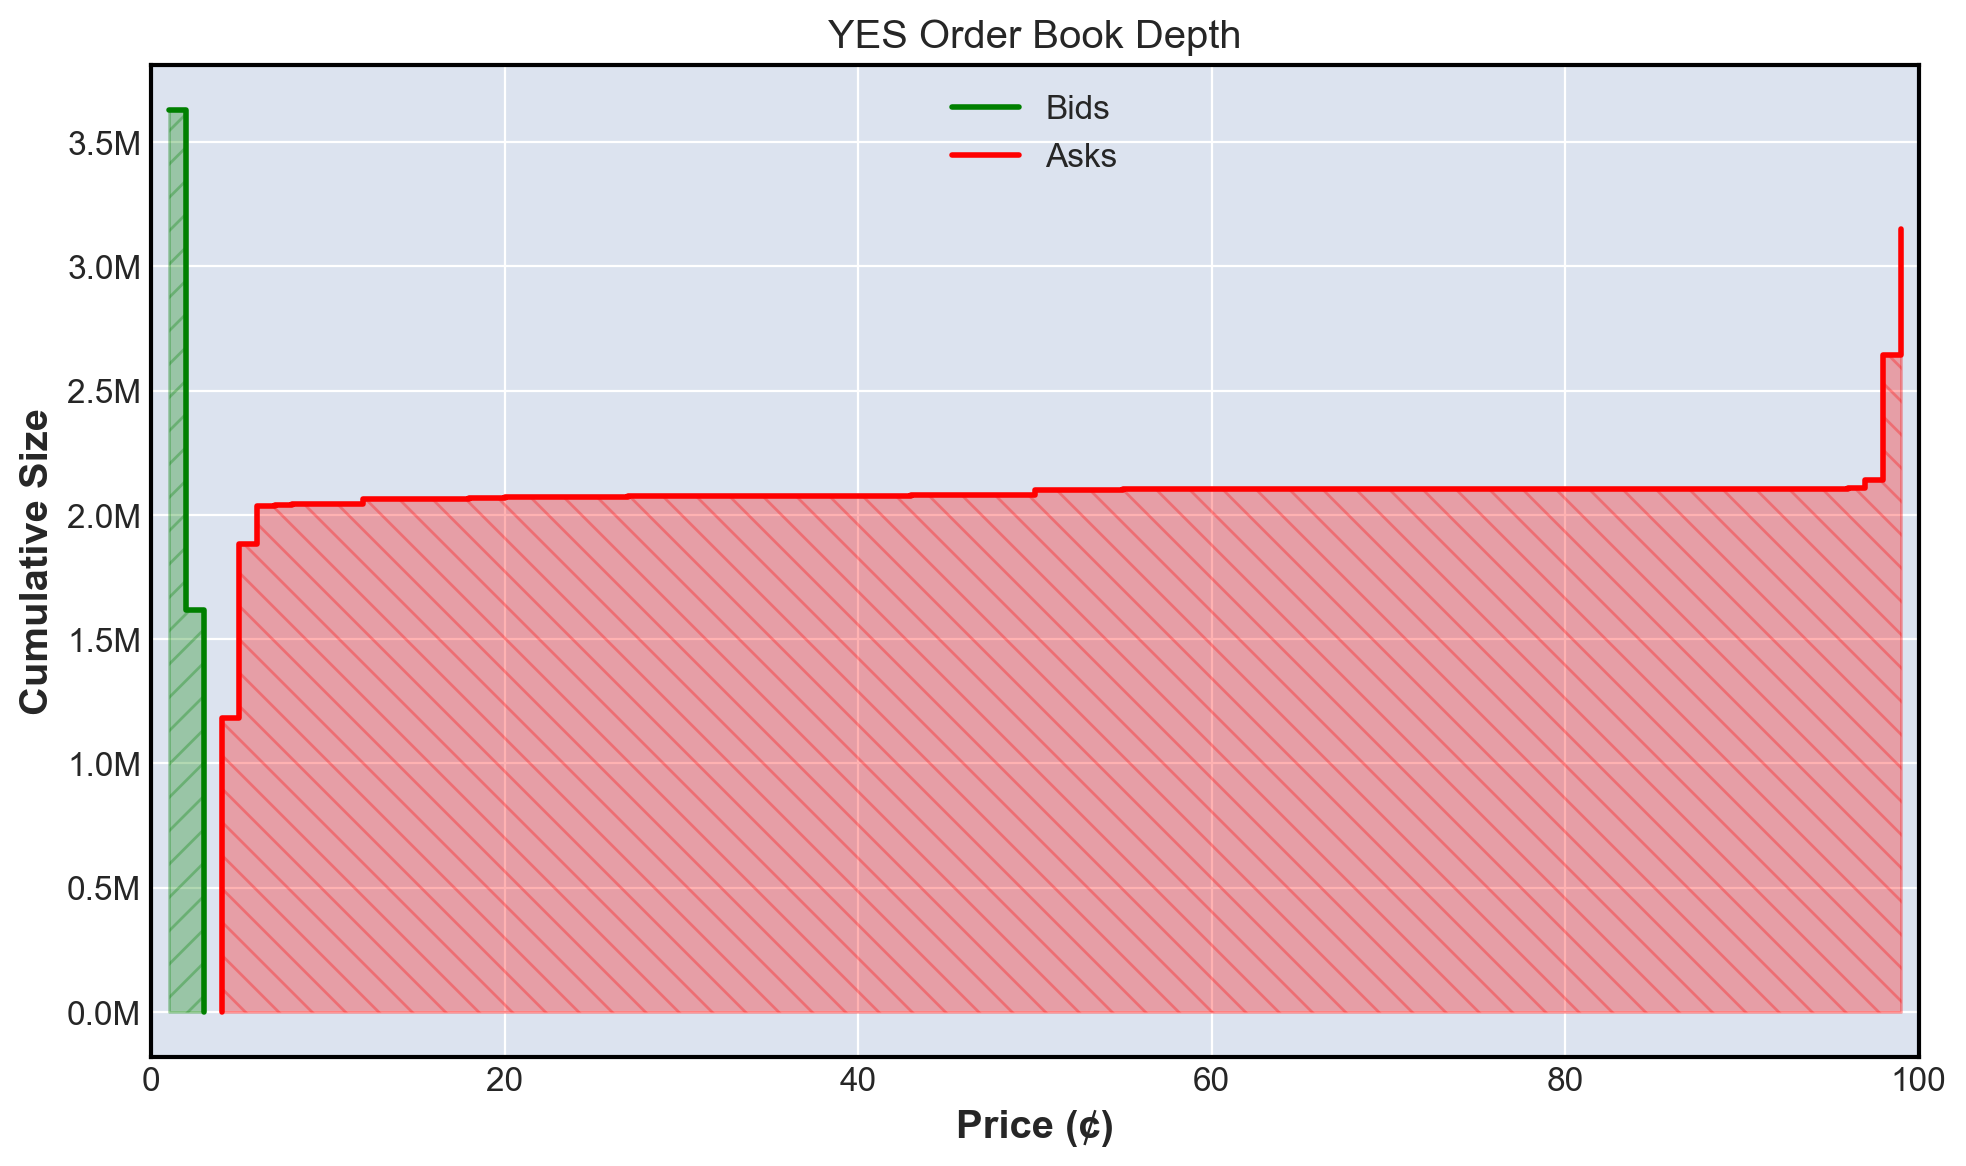

In [14]:
plot_market_lob("KXFEDDECISION-25JUL-C25")

In [15]:
import time
import os

def live_market_lob(ticker, refresh_interval=1):
    try:
        while True:
            loop_start = time.time()
            os.system('cls' if os.name == 'nt' else 'clear')

            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
            yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

            print(f"Live YES Order Book for {ticker} — refreshed at {time.strftime('%H:%M:%S')}\n")

            print("Bids:")
            for price, qty in yes_bids:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            print("\nAsks:")
            for price, qty in yes_asks:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            elapsed = time.time() - loop_start
            time.sleep(max(0, refresh_interval - elapsed))

    except KeyboardInterrupt:
        print("\nStopped.")


In [16]:
import time
from IPython.display import clear_output

def live_market_lob_notebook(ticker, refresh_interval=1):
    try:
        while True:
            loop_start = time.time()
            clear_output(wait=True)

            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
            yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

            print(f"Live YES Order Book for {ticker} — refreshed at {time.strftime('%H:%M:%S')}\n")

            print("Bids:")
            for price, qty in yes_bids:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            print("\nAsks:")
            for price, qty in yes_asks:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            elapsed = time.time() - loop_start
            time.sleep(max(0, refresh_interval - elapsed))

    except KeyboardInterrupt:
        print("\nStopped.")


In [17]:
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np

def live_plot_market_lob(ticker, refresh_interval=1):
    try:
        while True:
            # Get and format orderbook
            loop_start = time.time()
            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
            yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

            ask_prices = [p for p, _ in yes_asks]
            ask_sizes = [q for _, q in yes_asks]
            ask_cum = list(np.cumsum(ask_sizes))

            bid_prices = [p for p, _ in yes_bids]
            bid_sizes = [q for _, q in yes_bids]
            bid_cum = list(np.cumsum(bid_sizes[::-1]))[::-1]

            # Extend gracefully to 0 at same price
            bid_prices_ext = bid_prices + [bid_prices[-1]]
            bid_cum_ext = bid_cum + [0]
            ask_prices_ext = [ask_prices[0]] + ask_prices
            ask_cum_ext = [0] + ask_cum

            # Clear and plot
            clear_output(wait=True)
            plt.figure(figsize=(10, 6))
            plt.step(bid_prices_ext, bid_cum_ext, label="Bids", color="green", where="post")
            plt.step(ask_prices_ext, ask_cum_ext, label="Asks", color="red", where="post")

            plt.fill_between(bid_prices_ext, bid_cum_ext, step="post", color="green", alpha=0.3, hatch='//')
            plt.fill_between(ask_prices_ext, ask_cum_ext, step="post", color="red", alpha=0.3, hatch='\\\\')

            # Format y-axis with K/M
            import matplotlib.ticker as mticker
            max_val = max(max(bid_cum_ext, default=0), max(ask_cum_ext, default=0))
            if max_val >= 1_000_000:
                divisor = 1_000_000
                suffix = "M"
            elif max_val >= 1_000:
                divisor = 1_000
                suffix = "K"
            else:
                divisor = 1
                suffix = ""
            plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x / divisor:.1f}{suffix}"))

            plt.xlabel("Price (¢)")
            plt.ylabel("Cumulative Size")
            plt.title(f"YES Order Book Depth — {ticker} ({time.strftime('%H:%M:%S')})")
            plt.legend(loc="upper center")
            plt.xlim(0, 100)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

            elapsed = time.time() - loop_start
            time.sleep(max(0, refresh_interval - elapsed))


    except KeyboardInterrupt:
        clear_output(wait=True)
        print("Live plot stopped.")


In [18]:
exchange.get_exchange_schedule()

{'schedule': {'standard_hours': [{'start_time': '2024-12-01T00:00:00Z',
    'end_time': '2200-12-01T00:00:00Z',
    'monday': [{'open_time': '00:00', 'close_time': '03:00'},
     {'open_time': '08:00', 'close_time': '00:00'}],
    'tuesday': [{'open_time': '00:00', 'close_time': '03:00'},
     {'open_time': '08:00', 'close_time': '00:00'}],
    'wednesday': [{'open_time': '00:00', 'close_time': '03:00'},
     {'open_time': '08:00', 'close_time': '00:00'}],
    'thursday': [{'open_time': '00:00', 'close_time': '03:00'},
     {'open_time': '08:00', 'close_time': '00:00'}],
    'friday': [{'open_time': '00:00', 'close_time': '03:00'},
     {'open_time': '08:00', 'close_time': '00:00'}],
    'saturday': [{'open_time': '00:00', 'close_time': '03:00'},
     {'open_time': '08:00', 'close_time': '00:00'}],
    'sunday': [{'open_time': '00:00', 'close_time': '03:00'},
     {'open_time': '08:00', 'close_time': '00:00'}]}],
  'maintenance_windows': []}}

In [19]:
market.get_trades("KXFEDDECISION-25JUL-C25", min_ts="11/01/2024", )

{'trades': [{'trade_id': '59b38f75-eee4-4bef-b4c4-08f2bfb8aa3d',
   'ticker': 'KXFEDDECISION-25JUL-C25',
   'count': 350,
   'created_time': '2025-07-15T16:23:59.612646Z',
   'yes_price': 4,
   'no_price': 96,
   'taker_side': 'yes'},
  {'trade_id': '2332de99-ce2b-418f-9670-e21426465b3a',
   'ticker': 'KXFEDDECISION-25JUL-C25',
   'count': 100,
   'created_time': '2025-07-15T16:18:19.242342Z',
   'yes_price': 4,
   'no_price': 96,
   'taker_side': 'yes'},
  {'trade_id': 'bbb243a1-4dba-47d4-baae-28482580ef52',
   'ticker': 'KXFEDDECISION-25JUL-C25',
   'count': 60,
   'created_time': '2025-07-15T16:16:49.559741Z',
   'yes_price': 4,
   'no_price': 96,
   'taker_side': 'yes'},
  {'trade_id': '2c094877-feaa-4083-8ee6-50ec5b2fa11a',
   'ticker': 'KXFEDDECISION-25JUL-C25',
   'count': 119,
   'created_time': '2025-07-15T16:15:27.889064Z',
   'yes_price': 3,
   'no_price': 97,
   'taker_side': 'no'},
  {'trade_id': 'e2aa07fa-0c26-4747-9d20-2d20910aafaf',
   'ticker': 'KXFEDDECISION-25JUL-C25

In [20]:
live_market_lob_notebook("KXFEDDECISION-25JUL-C25")

Live YES Order Book for KXFEDDECISION-25JUL-C25 — refreshed at 12:25:55

Bids:
  YES @ 1¢ × 2,013,752 contracts
  YES @ 2¢ × 1,108,340 contracts
  YES @ 3¢ × 509,179 contracts

Asks:
  YES @ 4¢ × 1,183,711 contracts
  YES @ 5¢ × 698,221 contracts
  YES @ 6¢ × 152,867 contracts
  YES @ 7¢ × 4,250 contracts
  YES @ 8¢ × 5,096 contracts
  YES @ 9¢ × 350 contracts
  YES @ 10¢ × 161 contracts
  YES @ 12¢ × 18,344 contracts
  YES @ 14¢ × 234 contracts
  YES @ 15¢ × 385 contracts
  YES @ 16¢ × 599 contracts
  YES @ 17¢ × 1,069 contracts
  YES @ 18¢ × 1,261 contracts
  YES @ 19¢ × 1,625 contracts
  YES @ 20¢ × 1,902 contracts
  YES @ 21¢ × 2,095 contracts
  YES @ 25¢ × 135 contracts
  YES @ 27¢ × 5,000 contracts
  YES @ 28¢ × 500 contracts
  YES @ 35¢ × 1 contracts
  YES @ 43¢ × 114 contracts
  YES @ 44¢ × 500 contracts
  YES @ 49¢ × 500 contracts
  YES @ 50¢ × 22,550 contracts
  YES @ 55¢ × 1,500 contracts
  YES @ 58¢ × 50 contracts
  YES @ 88¢ × 2,000 contracts
  YES @ 95¢ × 902 contracts
  

In [21]:
live_plot_market_lob("KXFEDDECISION-25JUL-C25")

Live plot stopped.


In [ ]:
# def record_orderbook_time_series(ticker, duration_secs=60, interval_secs=1.0):
#     import time
#     from datetime import datetime

#     snapshots = []
#     snapshot_count = 0
#     start_time = time.time()

#     try:
#         while time.time() - start_time < duration_secs:
#             loop_start = time.time()

#             # Fetch and parse orderbook
#             orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
#             yes_bids = orderbook["yes"]
#             yes_asks = [[100 - price, size] for price, size in orderbook["no"]]

#             bid_snapshot = {int(price): int(size) for price, size in yes_bids if size > 0}
#             ask_snapshot = {int(price): int(size) for price, size in yes_asks if size > 0}

#             now = datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S.%f")[:-3]

#             snapshots.append({
#                 "timestamp": now,
#                 "bids": bid_snapshot,
#                 "asks": ask_snapshot
#             })

#             snapshot_count += 1

#             elapsed = time.time() - loop_start
#             time.sleep(max(0, interval_secs - elapsed))

#     except KeyboardInterrupt:
#         print("Stopped by user.")

#     import sys
#     from sys import getsizeof

#     total_bytes = sum(getsizeof(s) for s in snapshots)
#     size_mb = total_bytes / (1024 ** 2)

#     print(f"\nRecording complete: {snapshot_count} snapshots collected.")
#     print(f"Total memory used: {size_mb:.2f} MB")

#     return snapshots


In [24]:
# snapshot = record_orderbook_time_series("KXFEDDECISION-25JUL-C25", duration_secs=60, interval_secs=1)

In [ ]:
# import pandas as pd

# def snapshot_list_to_dfs(snapshots):
#     price_levels = list(range(101))
#     bids_ts = pd.DataFrame(columns=price_levels)
#     asks_ts = pd.DataFrame(columns=price_levels)

#     for snap in snapshots:
#         timestamp = snap["timestamp"]
#         bids_row = {int(p): snap["bids"].get(p, 0) for p in price_levels}
#         asks_row = {int(p): snap["asks"].get(p, 0) for p in price_levels}
#         bids_ts.loc[timestamp] = bids_row
#         asks_ts.loc[timestamp] = asks_row

#     return bids_ts.astype(int), asks_ts.astype(int)

In [ ]:
# # Convert back to DataFrames
# bids_df, asks_df = snapshot_list_to_dfs(snapshot)

# asks_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
2025-07-12 15:32:31.598,0,0,0,0,0,0,813730,701550,7500,4096,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 15:32:32.600,0,0,0,0,0,0,813730,701550,7500,4096,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 15:32:33.607,0,0,0,0,0,0,813730,701550,7500,4096,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 15:32:34.618,0,0,0,0,0,0,813730,701550,7500,4096,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 15:32:35.606,0,0,0,0,0,0,813730,701550,7500,4096,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 15:32:36.605,0,0,0,0,0,0,813730,701550,7500,4096,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 15:32:37.624,0,0,0,0,0,0,813730,701550,7500,4096,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 15:32:38.619,0,0,0,0,0,0,813730,701550,7500,4096,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 15:32:39.656,0,0,0,0,0,0,813730,701550,7500,4096,...,0,0,0,0,902,4000,30700,503000,509000,0
2025-07-12 15:32:40.622,0,0,0,0,0,0,813730,701550,7500,4096,...,0,0,0,0,902,4000,30700,503000,509000,0


In [ ]:
# open_mkts.sort_values(by='volume', ascending=False)

,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.House Winner,custom_strike.President Winner,custom_strike.Senate Winner,custom_strike.Disease,custom_strike.Chemical,custom_strike.Cryptocurrency,custom_strike.Chamber of Congress,custom_strike.Public Health Emergency/Pandemic,fee_waiver_expiration_time,custom_strike.Chart
5903,KXFEDDECISION-25JUL-C25,KXFEDDECISION-25JUL,binary,Will the Federal Reserve Cut rates by 25bps at...,Cut 25bps,Cut 25bps,Cut 25bps,2025-06-18T14:00:00Z,2025-07-30T17:55:00Z,2025-07-30T18:05:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5901,KXFEDDECISION-25JUL-H0,KXFEDDECISION-25JUL,binary,Will the Federal Reserve Hike rates by 0bps at...,Hike 0bps,Fed maintains rate,Fed maintains rate,2025-06-18T14:00:00Z,2025-07-30T17:55:00Z,2025-07-30T18:05:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9226,KXWMENSINGLES-25-CA,KXWMENSINGLES-25,binary,Will the Carlos Alcaraz win the 2025 Wimbledon?,,Carlos Alcaraz,Carlos Alcaraz,2025-02-11T15:00:00Z,2027-07-13T14:00:00Z,2025-07-13T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9225,KXWMENSINGLES-25-JS,KXWMENSINGLES-25,binary,Will the Jannik Sinner win the 2025 Wimbledon?,,Jannik Sinner,Jannik Sinner,2025-02-11T15:00:00Z,2027-07-13T14:00:00Z,2025-07-13T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7282,KXWWOMENSINGLES-25-IS,KXWWOMENSINGLES-25,binary,Will the Iga Swiatek win the Wimbledon Women's...,,Iga Swiatek,Iga Swiatek,2025-05-14T14:00:00Z,2027-07-13T14:00:00Z,2025-07-13T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,KXATPMATCH-25JUL13KOPDEL-DEL,KXATPMATCH-25JUL13KOPDEL,binary,Will Hugo Dellien be a winner of the round of ...,,Hugo Dellien,Hugo Dellien,2025-07-12T13:55:00Z,2027-07-13T08:00:00Z,2025-07-13T11:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,KXATPMATCH-25JUL13KOPDEL-KOP,KXATPMATCH-25JUL13KOPDEL,binary,Will Vit Kopriva be a winner of the round of 3...,,Vit Kopriva,Vit Kopriva,2025-07-12T13:55:00Z,2027-07-13T08:00:00Z,2025-07-13T11:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,KXATPMATCH-25JUL13YMEVAN-YME,KXATPMATCH-25JUL13YMEVAN,binary,Will Mikael Ymer be a winner of the round of 3...,,Mikael Ymer,Mikael Ymer,2025-07-12T13:55:00Z,2027-07-13T08:00:00Z,2025-07-13T11:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,KXATPMATCH-25JUL13YMEVAN-VAN,KXATPMATCH-25JUL13YMEVAN,binary,Will Botic Van de Zandschulp be a winner of th...,,Botic Van de Zandschulp,Botic Van de Zandschulp,2025-07-12T13:55:00Z,2027-07-13T08:00:00Z,2025-07-13T11:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import time
import random
import threading
import queue
import json
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor, as_completed
from requests.exceptions import HTTPError

class MarketLOBRecorder:
    def __init__(self,
                 tickers,
                 interval_secs: float = 0.5,
                 max_workers: int = None,
                 max_retries: int = 5,
                 base_backoff: float = 0.1,
                 calls_per_sec: int = 30,
                 output_path: str = "lob_stream.jsonl"):
        self.tickers = tickers
        self.interval_secs = interval_secs
        self.max_retries = max_retries
        self.base_backoff = base_backoff

        # sensible default for max_workers
        self.max_workers = max_workers if max_workers is not None else min(32, len(tickers))
        self._executor = ThreadPoolExecutor(self.max_workers)

        # rate-limiter setup based on API tier
        self.min_interval = 1.0 / calls_per_sec
        self._lock = threading.Lock()
        self._last_call = 0.0

        # error tracking
        self.error_counts = {tk: 0 for tk in tickers}

        # streaming writer setup
        self._write_q = queue.Queue(maxsize=10000)
        self._out_fh = open(output_path, "w")
        self._writer_thread = threading.Thread(target=self._writer_loop, daemon=True)
        self._writer_thread.start()

    def _writer_loop(self):
        """Continuously write JSONL records from the queue to disk."""
        while True:
            rec = self._write_q.get()
            if rec is None:
                break
            self._out_fh.write(json.dumps(rec) + "\n")
            # flush occasionally for safety
            if self._write_q.qsize() < 100:
                self._out_fh.flush()
        self._out_fh.flush()
        self._out_fh.close()

    def _wait_rate_limit(self):
        """Enforce global calls_per_sec limit across threads."""
        with self._lock:
            now = time.time()
            elapsed = now - self._last_call
            if elapsed < self.min_interval:
                time.sleep(self.min_interval - elapsed)
            self._last_call = time.time()

    def _fetch_one(self, ticker):
        """Fetch a single LOB with retries, backoff, and rate-limiting."""
        last_exc = None
        for attempt in range(1, self.max_retries + 1):
            try:
                self._wait_rate_limit()
                resp = market.get_market_orderbook(ticker=ticker)
                book = resp.get("orderbook") or {}
                yes_list = book.get("yes") if isinstance(book.get("yes"), list) else []
                no_list = book.get("no") if isinstance(book.get("no"), list) else []

                bids = {int(p): int(sz) for p, sz in yes_list if sz > 0}
                asks = {int(100-p): int(sz) for p, sz in no_list if sz > 0}

                if not yes_list and not no_list:
                    raise ValueError("Empty orderbook arrays")

                record = {
                    "timestamp": datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S.%f")[:-3],
                    "ticker": ticker,
                    "bids": bids,
                    "asks": asks
                }
                return record

            except HTTPError as http_err:
                status = getattr(http_err.response, "status_code", None)
                if status == 429 and attempt < self.max_retries:
                    # exponential backoff + jitter
                    delay = self.base_backoff * (2 ** (attempt - 1))
                    delay *= random.uniform(0.8, 1.2)
                    time.sleep(delay)
                    last_exc = http_err
                    continue
                last_exc = http_err
                break

            except Exception as exc:
                # jitter on other errors
                delay = self.base_backoff * random.uniform(0.5, 1.5)
                time.sleep(delay)
                last_exc = exc
                continue

        # all retries exhausted or forced error
        self.error_counts[ticker] += 1
        record = {
            "timestamp": datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S.%f")[:-3],
            "ticker": ticker,
            "bids": {},
            "asks": {},
            "error": repr(last_exc)
        }
        return record

    def _fetch_all(self):
        """Fetch LOBs for all tickers in parallel and stream records to disk."""
        futures = {self._executor.submit(self._fetch_one, tk): tk for tk in self.tickers}
        records = [f.result() for f in as_completed(futures)]
        for rec in records:
            self._write_q.put(rec)
        return records

    def start(self, duration_secs: float):
        """Run the polling loop and stream records until duration_secs elapses."""
        end = time.time() + duration_secs
        while time.time() < end:
            cycle_start = time.time()
            self._fetch_all()
            elapsed = time.time() - cycle_start
            time.sleep(max(0, self.interval_secs - elapsed))

        # signal writer thread to shut down
        self._write_q.put(None)
        self._writer_thread.join()
        print("Done streaming to disk.")
        print("Errors by ticker:", self.error_counts)


In [26]:
# import os
# import json
# import time
# import numpy as np
# import pandas as pd

# # ————— PARAMETERS TO SWEEP —————
# ticker_counts = [100, 200]  # number of tickers to record
# intervals    = [5.0, 10.0]  # seconds between cycles
# worker_counts= [22, 44]  # number of threads to use

# duration_secs = 40  # keep runs short for testing

# ALL_TICKERS = open_mkts.sort_values(by='volume', ascending=False)\
#                       .head(200)['ticker'].tolist()

# results = []

# def dump_snapshots_to_jsonl(snaps, fname):
#     with open(fname, "w") as f:
#         for s in snaps:
#             f.write(json.dumps(s) + "\n")
#     return os.path.getsize(fname)

# for n in ticker_counts:
#     tickers = ALL_TICKERS[:n]
#     for interval in intervals:
#         seen_workers = set()
#         for workers in worker_counts:
#             max_workers = min(workers, n)
#             if max_workers in seen_workers:
#                 continue
#             seen_workers.add(max_workers)

#             # initialize and run recorder
#             rec = MarketLOBRecorder(
#                 tickers=tickers,
#                 interval_secs=interval,
#                 max_workers=max_workers
#             )
#             t0 = time.time()
#             rec.start(duration_secs=duration_secs)
#             total_time = time.time() - t0

#             # count errors
#             error_count = sum(rec.error_counts.values())
#             total_snaps = len(rec.snapshots)
#             error_rate  = error_count / total_snaps if total_snaps else float('nan')

#             # dump to JSONL and measure size
#             jsonl_file = f"test_n{n}_int{interval}_w{max_workers}.jsonl"
#             size_bytes = dump_snapshots_to_jsonl(rec.snapshots, jsonl_file)

#             # build DataFrame of timestamps
#             df_snaps = pd.DataFrame(rec.snapshots)
#             df_snaps['ts_dt'] = pd.to_datetime(
#                 df_snaps['timestamp'], format='%Y-%m-%d %H:%M:%S.%f'
#             )

#             # compute per-ticker MSE of observed intervals vs target
#             mse_list = []
#             for _, group in df_snaps.groupby('ticker'):
#                 times  = np.sort(group['ts_dt'].values)
#                 deltas = np.diff(times).astype('timedelta64[ns]').astype(np.float64) / 1e9
#                 errs   = (deltas - interval) ** 2
#                 if len(errs):
#                     mse_list.append(errs.mean())
#             interval_mse = float(np.mean(mse_list)) if mse_list else float('nan')

#             # compute other timing metrics
#             cycles      = total_snaps / n if n else 0
#             avg_cycle   = total_time / cycles if cycles else float("nan")
#             avg_latency = avg_cycle / n if n else float("nan")

#             results.append({
#                 "n_tickers":     n,
#                 "interval_s":    interval,
#                 "max_workers":   max_workers,
#                 "calls_per_sec": rec.calls_per_sec if hasattr(rec, 'calls_per_sec') else None,
#                 "avg_cycle_s":   round(avg_cycle, 3),
#                 "avg_latency_s": round(avg_latency, 3),
#                 "file_size_MB":  round(size_bytes / (1024**2), 3),
#                 "interval_mse":  round(interval_mse,   6),
#                 "error_count":   error_count,
#                 "error_rate":    round(error_rate,    3),
#             })

#             # cleanup
#             os.remove(jsonl_file)
#             print(f"Done n={n}, int={interval}, w={max_workers}, calls={calls} ")

# # summarize in a DataFrame
# df = pd.DataFrame(results)
# df

In [41]:
# open_mkts.sort_values(by='volume', ascending=False).head(500).sort_values(by='close_time', ascending=True)
open_mkts.sort_values(by='close_time', ascending=True).head(3000).sort_values(by='volume', ascending=False)

,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.House Winner,custom_strike.President Winner,custom_strike.Senate Winner,custom_strike.Disease,custom_strike.Chemical,custom_strike.Cryptocurrency,custom_strike.Chamber of Congress,custom_strike.Public Health Emergency/Pandemic,fee_waiver_expiration_time,custom_strike.Chart
1998,KXBTCD-25JUL1513-T116249.99,KXBTCD-25JUL1513,binary,"Bitcoin price on Jul 15, 2025?","$116,250 or above","$116,250 or above","$116,250 or above",2025-07-15T16:00:00Z,2025-07-15T17:00:00Z,2025-07-15T17:05:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2707,KXINXU-25JUL15H1600-T6324.9999,KXINXU-25JUL15H1600,binary,"Will the S&P 500 be above 6324.9999 on Jul 15,...","6,325.0099 or above","6,325 or above","6,325 or above",2025-07-14T20:00:00Z,2025-07-15T20:00:00Z,2025-07-15T23:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1651,KXBTCD-25JUL1517-T116999.99,KXBTCD-25JUL1517,binary,"Bitcoin price on Jul 15, 2025?","$117,000 or above","$117,000 or above","$117,000 or above",2025-07-14T20:00:00Z,2025-07-15T21:00:00Z,2025-07-15T21:05:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,KXBTCD-25JUL1513-T116749.99,KXBTCD-25JUL1513,binary,"Bitcoin price on Jul 15, 2025?","$116,750 or above","$116,750 or above","$116,750 or above",2025-07-15T16:00:00Z,2025-07-15T17:00:00Z,2025-07-15T17:05:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2935,KXINXU-25JUL15H1300-T6274.9999,KXINXU-25JUL15H1300,binary,"Will the S&P 500 be above 6274.9999 on Jul 15,...","6,275.0099 or above","6,275 or above","6,275 or above",2025-07-15T16:00:00Z,2025-07-15T17:00:00Z,2025-07-15T17:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,KXINXU-25JUL15H1300-T6524.9999,KXINXU-25JUL15H1300,binary,"Will the S&P 500 be above 6524.9999 on Jul 15,...","6,525.0099 or above","6,525 or above","6,525 or above",2025-07-15T16:00:00Z,2025-07-15T17:00:00Z,2025-07-15T17:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2886,KXINXU-25JUL15H1300-T6519.9999,KXINXU-25JUL15H1300,binary,"Will the S&P 500 be above 6519.9999 on Jul 15,...","6,520.0099 or above","6,520 or above","6,520 or above",2025-07-15T16:00:00Z,2025-07-15T17:00:00Z,2025-07-15T17:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2887,KXINXU-25JUL15H1300-T6514.9999,KXINXU-25JUL15H1300,binary,"Will the S&P 500 be above 6514.9999 on Jul 15,...","6,515.0099 or above","6,515 or above","6,515 or above",2025-07-15T16:00:00Z,2025-07-15T17:00:00Z,2025-07-15T17:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2866,KXINXU-25JUL15H1300-T6619.9999,KXINXU-25JUL15H1300,binary,"Will the S&P 500 be above 6619.9999 on Jul 15,...","6,620.0099 or above","6,620 or above","6,620 or above",2025-07-15T16:00:00Z,2025-07-15T17:00:00Z,2025-07-15T17:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import time
from datetime import datetime
import numpy as np
import pandas as pd

# 1. Prepare tickers
# Replace `open_mkts` with your DataFrame of open markets, sorted by volume
tickers = open_mkts.sort_values(by='volume', ascending=False).head(100)['ticker'].tolist()

# 2. Instantiate recorder: 10s interval, up to 32 threads, 30 calls/sec
rec = MarketLOBRecorder(
    tickers=tickers,
    interval_secs=30,
    max_workers=min(32, len(tickers))
)

# 3. Run 
t0 = time.time()
rec.start(duration_secs=120)
total_duration = time.time() - t0

# 4. Load results from JSONL file
df = pd.read_json("lob_stream.jsonl", lines=True)
df['ts_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

Done streaming to disk.
Errors by ticker: {'KXFEDDECISION-25JUL-C25': 0, 'KXFEDDECISION-25JUL-H0': 0, 'KXWMENSINGLES-25-CA': 0, 'KXWMENSINGLES-25-JS': 0, 'KXWWOMENSINGLES-25-IS': 4, 'KXFEDDECISION-25JUL-C26': 0, 'KXMAYORNYCPARTY-25-EADA': 0, 'RECSSNBER-25': 0, 'KXWWOMENSINGLES-25-ANA': 4, 'KXMAYORNYCPARTY-25-D': 0, 'KXMAYORNYCPARTY-25-AC': 0, 'KXBTCRESERVE-26-JAN01': 0, 'KXNOBELPEACE-25-DJT': 0, 'KXBTCMAXY-25-DEC31-124999.99': 0, 'KXDOED-26-JAN01': 0, 'KXNEWPARTYMUSK-26': 0, 'KXLARGETARIFF': 0, 'KXMAYORNYCPARTY-25-R': 0, 'KXGREENLAND-29': 0, 'LEAVEPOWELL-25-DEC31': 0, 'KXGOVTCUTS-25-250': 0, 'KXRATECUTCOUNT-25DEC31-T0': 0, 'KXPRESNOMD-28-SAS': 0, 'KXBTCMAXY-25-DEC31-149999.99': 0, 'FED-25JUL-T4.25': 0, 'KXPRESNOMD-28-GN': 0, 'KXPRESNOMD-28-AOC': 0, 'KXEPSTEIN-26': 0, 'KXGOVTCUTS-25-1': 0, 'KXPRESNOMD-28-KH': 0, 'KXSHUTDOWNBY-25': 0, 'KXPRESNOMD-28-PB': 0, 'KXGOVTCUTS-25-500': 0, 'KXCPIYOY-25JUN-T2.5': 0, 'KXRATECUTCOUNT-25DEC31-T1': 0, 'KXCPIYOY-25JUN-T2.6': 0, 'KXPRESNOMD-28-WM': 0, '

In [ ]:
# 5. Compute error metrics
total_records = len(df)
error_count = df['error'].notnull().sum()
error_rate = error_count / total_records

# 6. Compute per-ticker precision MSE and overall cycle stats
mse_list = []
all_deltas = []

for tk, group in df.groupby('ticker'):
    times = group.sort_values('ts_dt')['ts_dt']
    deltas = times.diff().dt.total_seconds().dropna()
    if not deltas.empty:
        mse_list.append(((deltas - 10.0)**2).mean())
        all_deltas.extend(deltas.values)

precision_mse = float(np.mean(mse_list)) if mse_list else float('nan')
mean_cycle = float(np.mean(all_deltas)) if all_deltas else float('nan')
std_cycle = float(np.std(all_deltas)) if all_deltas else float('nan')

# 7. Print summary
print(f"Total duration:         {total_duration:.2f} s")
print(f"Total records:          {total_records}")
print(f"Error count:            {error_count}")
print(f"Error rate:             {error_rate:.2%}")
print(f"Precision MSE (10s):    {precision_mse:.6f}")
print(f"Mean cycle length:      {mean_cycle:.3f} s")
print(f"Cycle length std dev:   {std_cycle:.3f} s")


In [52]:
open_mkts[open_mkts['volume'] > 30000].sort_values(by='close_time', ascending=True)

,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,custom_strike.House Winner,custom_strike.President Winner,custom_strike.Senate Winner,custom_strike.Disease,custom_strike.Chemical,custom_strike.Cryptocurrency,custom_strike.Chamber of Congress,custom_strike.Public Health Emergency/Pandemic,fee_waiver_expiration_time,custom_strike.Chart
6380,KXRTSMURFS-30,KXRTSMURFS,binary,Smurfs Rotten Tomatoes score?,Above 30,Above 30,Above 30,2025-07-01T12:00:02Z,2025-07-21T14:00:00Z,2025-07-21T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5564,KXRTSMURFS-25,KXRTSMURFS,binary,Smurfs Rotten Tomatoes score?,Above 25,Above 25,Above 25,2025-07-02T22:00:44Z,2025-07-21T14:00:00Z,2025-07-21T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5563,KXRTSMURFS-20,KXRTSMURFS,binary,Smurfs Rotten Tomatoes score?,Above 20,Above 20,Above 20,2025-07-02T22:38:33Z,2025-07-21T14:00:00Z,2025-07-21T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8519,KXRTSMURFS-60,KXRTSMURFS,binary,Smurfs Rotten Tomatoes score?,"Above 60:: This movie is ""Fresh!""",Above 60,Above 60,2025-06-02T14:00:00Z,2025-07-21T14:00:00Z,2025-07-21T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8520,KXRTSMURFS-45,KXRTSMURFS,binary,Smurfs Rotten Tomatoes score?,Above 45::,Above 45,Above 45,2025-06-02T14:00:00Z,2025-07-21T14:00:00Z,2025-07-21T14:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,KXPRESPERSON-28-JVAN,KXPRESPERSON-28,binary,Who will win the next presidential election?,:: Republican,J.D. Vance,J.D. Vance,2025-05-10T14:00:00Z,2029-11-07T15:00:00Z,2029-01-21T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9842,KXPRESPERSON-28-GNEWS,KXPRESPERSON-28,binary,Who will win the next presidential election?,:: Democratic,Gavin Newsom,Gavin Newsom,2025-05-10T14:00:00Z,2029-11-07T15:00:00Z,2029-01-21T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9843,KXPRESPERSON-28-AOCA,KXPRESPERSON-28,binary,Who will win the next presidential election?,:: Democratic,Alexandria Ocasio-Cortez,Alexandria Ocasio-Cortez,2025-05-10T14:00:00Z,2029-11-07T15:00:00Z,2029-01-21T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13146,OAIAGI-29,OAIAGI,binary,Will OpenAI announce the creation of AGI?,Before 2030,Before 2030,Not Before 2030,2024-04-04T12:00:00Z,2030-01-01T04:59:00Z,2024-12-31T15:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
pd.json_normalize(market.get_markets(event_ticker='KXRTSMURFS')['markets'])['ticker'].tolist()

['KXRTSMURFS-10',
 'KXRTSMURFS-5',
 'KXRTSMURFS-0',
 'KXRTSMURFS-15',
 'KXRTSMURFS-20',
 'KXRTSMURFS-25',
 'KXRTSMURFS-40',
 'KXRTSMURFS-35',
 'KXRTSMURFS-30',
 'KXRTSMURFS-90',
 'KXRTSMURFS-75',
 'KXRTSMURFS-60',
 'KXRTSMURFS-45']

In [59]:
import pandas as pd

df = pd.read_json(r"C:\Users\nicco\lob_stream.jsonl", lines=True)
df


,timestamp,ticker,bids,asks,error
0,2025-07-15 18:46:13.945,KXRTSMURFS-0,"{'1': 500, '5': 1000, '7': 77, '10': 500, '15'...",{},NaN
1,2025-07-15 18:46:13.972,KXRTSMURFS-5,"{'1': 532, '4': 1000, '7': 500, '27': 500, '47...",{'98': 5000},NaN
2,2025-07-15 18:46:14.011,KXRTSMURFS-10,"{'1': 500, '3': 1000, '4': 999, '17': 500, '37...","{'99': 600, '98': 500, '96': 500, '94': 5, '92...",NaN
3,2025-07-15 18:46:14.036,KXRTSMURFS-15,"{'1': 2500, '2': 250, '3': 666, '6': 500, '10'...","{'99': 7501, '98': 102, '97': 2000, '89': 119,...",NaN
4,2025-07-15 18:46:14.071,KXRTSMURFS-20,"{'1': 500, '2': 150, '4': 200, '5': 333, '18':...","{'99': 500, '97': 2500, '96': 50, '95': 100, '...",NaN
...,...,...,...,...,...
6339,2025-07-15 18:56:13.844,KXRTSMURFS-30,"{'1': 500, '10': 500, '16': 5, '18': 114, '20'...","{'99': 700, '89': 500, '85': 1000, '82': 500, ...",NaN
6340,2025-07-15 18:56:13.874,KXRTSMURFS-90,{},"{'99': 500, '90': 500, '89': 2000, '88': 16, '...",NaN
6341,2025-07-15 18:56:13.909,KXRTSMURFS-75,{},"{'99': 5175, '98': 100, '91': 500, '71': 500, ...",NaN
6342,2025-07-15 18:56:13.941,KXRTSMURFS-60,"{'1': 679, '2': 20}","{'99': 10500, '93': 500, '92': 25, '84': 200, ...",NaN


In [64]:
# 5. Compute error metrics
total_records = len(df)
error_count = df['error'].notnull().sum()
error_rate = error_count / total_records

# 6. Compute per-ticker precision MSE and overall cycle stats
mse_list = []
all_deltas = []

for tk, group in df.groupby('ticker'):
    times = group.sort_values('timestamp')['timestamp']
    deltas = times.diff().dt.total_seconds().dropna()
    if not deltas.empty:
        mse_list.append(((deltas - 1.0)**2).mean())
        all_deltas.extend(deltas.values)

precision_mse = float(np.mean(mse_list)) if mse_list else float('nan')
mean_cycle = float(np.mean(all_deltas)) if all_deltas else float('nan')
std_cycle = float(np.std(all_deltas)) if all_deltas else float('nan')

# 7. Print summary
print(f"Total records:          {total_records}")
print(f"Error count:            {error_count}")
print(f"Error rate:             {error_rate:.2%}")
print(f"Precision MSE:          {precision_mse:.6f}")
print(f"Mean cycle length:      {mean_cycle:.3f} s")
print(f"Cycle length std dev:   {std_cycle:.3f} s")


Total records:          6344
Error count:            1
Error rate:             0.02%
Precision MSE:          0.286883
Mean cycle length:      1.231 s
Cycle length std dev:   0.483 s


## 3.0 Correlation Analysis

In [13]:
weather_series = pd.json_normalize(events.get_series_list(category='Climate and Weather')['series'])
weather_titles = pd.Series(weather_series['title'].unique())
weather_titles.sort_values()
weather_series

,ticker,frequency,title,category,tags,settlement_sources,contract_url,fee_type,fee_multiplier
0,KXSNOWAZ,custom,Snow in Phoenix,Climate and Weather,None,[{'url': 'https://forecast.weather.gov/product...,https://kalshi-public-docs.s3.us-east-1.amazon...,quadratic,0
1,KXEMERGENCYLA,custom,Natural disaster hits Los Angeles,Climate and Weather,[Hurricanes],[{'url': 'https://forecast.weather.gov/product...,https://kalshi-public-docs.s3.us-east-1.amazon...,quadratic,0
2,KXHURNYC,custom,Hurricane hits NYC,Climate and Weather,[Hurricanes],[{'url': 'https://forecast.weather.gov/product...,https://kalshi-public-docs.s3.us-east-1.amazon...,quadratic,0
3,KXRAINSEA,daily,Seattle rain,Climate and Weather,None,[{'url': 'https://w2.weather.gov/climate/index...,https://kalshi-public-docs.s3.us-east-1.amazon...,quadratic,0
4,KXEARTHQUAKE,custom,earthquake,Climate and Weather,[Natural disasters],[{'url': 'https://earthquake.usgs.gov/earthqua...,https://kalshi-public-docs.s3.us-east-1.amazon...,quadratic,0
...,...,...,...,...,...,...,...,...,...
90,KXNEXTCAT5HURDATE,custom,Next CAT 5 hurricane date,Climate and Weather,[Hurricanes],[{'url': 'https://www.nhc.noaa.gov/archive/202...,https://kalshi-public-docs.s3.us-east-1.amazon...,quadratic,0
91,KXEMERGENCYSTL,custom,Natural disaster hits St. Louis,Climate and Weather,[Hurricanes],[{'url': 'https://forecast.weather.gov/product...,https://kalshi-public-docs.s3.us-east-1.amazon...,quadratic,0
92,KXHURCOASTTEX,custom,Hurricane hits coastal Texas,Climate and Weather,[Hurricanes],[{'url': 'https://www.weather.gov/wrh/climate?...,https://kalshi-public-docs.s3.us-east-1.amazon...,quadratic,0
93,KXHURNO,annual,Hurricane hits New Orleans,Climate and Weather,"[Hurricanes, Natural disasters]",[{'url': 'https://forecast.weather.gov/product...,https://kalshi-public-docs.s3.us-east-1.amazon...,quadratic,0


In [14]:
weather_series_dict = {'KXHIGHUS': 'High temp in United States',
'KXHIGHAUS': 'Highest temperature in Austin',
'KXHIGHCHI': 'Highest temperature in Chicago',
'KXHIGHDEN': 'Highest temperature in Denver',
'KXHIGHHOU': 'Highest temperature in Houston',
'KXHIGHLAX': 'Highest temperature in Los Angeles',
'KXHIGHMIA': 'Highest temperature in Miami',
'KXHIGHNY': 'Highest temperature in NYC',
'KXHIGHPHIL': 'Highest temperature in Philadelphia'}

In [15]:
events.get_series(series_ticker='KXHIGHAUS')

{'series': {'ticker': 'KXHIGHAUS',
  'frequency': 'daily',
  'title': 'Highest temperature in Austin',
  'category': 'Climate and Weather',
  'tags': ['Daily temperature'],
  'settlement_sources': [{'url': 'https://forecast.weather.gov/product.php?site=EWX&product=CLI&issuedby=AUS',
    'name': 'National Weather Service'}],
  'contract_url': 'https://kalshi-public-docs.s3.us-east-1.amazonaws.com/regulatory/product-certifications/AUSHIGH.pdf',
  'fee_type': 'quadratic',
  'fee_multiplier': 1}}

In [16]:
weather_events = pd.DataFrame()

for series_ticker in weather_series_dict.keys():
    events_temp = pd.json_normalize(events.get_events(series_ticker=series_ticker)['events'])
    weather_events = pd.concat([weather_events, events_temp], ignore_index=True)

# this will pull out whatever is between "in " and " on"
weather_events['City'] = weather_events['title'].str.extract(r'in\s+(.+?)(?=\s+(?:on|today|tomorrow|yesterday)\b|[?]|$)', expand=False).str.strip()
weather_events

,event_ticker,series_ticker,sub_title,title,collateral_return_type,mutually_exclusive,category,strike_date,City
0,HIGHUS-23OCT20,KXHIGHUS,"On Oct 20, 2023","High temp in United States on Oct 20, 2023?",MECNET,True,Climate and Weather,2023-10-21T03:59:00Z,United States
1,HIGHUS-23OCT18,KXHIGHUS,"On Oct 18, 2023","High temp in United States on Oct 18, 2023?",MECNET,True,Climate and Weather,2023-10-19T04:04:00Z,United States
2,HIGHUS-23OCT17,KXHIGHUS,"On Oct 17, 2023","High temp in United States on Oct 17, 2023?",MECNET,True,Climate and Weather,2023-10-18T05:09:00Z,United States
3,HIGHUS-23OCT13,KXHIGHUS,"On Oct 13, 2023","High temp in United States on Oct 13, 2023?",MECNET,True,Climate and Weather,2023-10-14T03:59:00Z,United States
4,HIGHUS-23OCT12,KXHIGHUS,"On Oct 12, 2023","High temp in United States on Oct 12, 2023?",MECNET,True,Climate and Weather,2023-10-13T03:59:00Z,United States
...,...,...,...,...,...,...,...,...,...
794,KXHIGHPHIL-25APR09,KXHIGHPHIL,"On Apr 9, 2025","Highest temperature in Philadelphia on Apr 9, ...",MECNET,True,Climate and Weather,NaN,Philadelphia
795,KXHIGHPHIL-25APR08,KXHIGHPHIL,"On Apr 8, 2025","Highest temperature in Philadelphia on Apr 8, ...",MECNET,True,Climate and Weather,NaN,Philadelphia
796,KXHIGHPHIL-25APR07,KXHIGHPHIL,"On Apr 7, 2025","Highest temperature in Philadelphia on Apr 7, ...",MECNET,True,Climate and Weather,NaN,Philadelphia
797,KXHIGHPHIL-25APR06,KXHIGHPHIL,"On Apr 6, 2025","Highest temperature in Philadelphia on Apr 6, ...",MECNET,True,Climate and Weather,NaN,Philadelphia


In [17]:
weather_markets = pd.DataFrame()

for series_ticker in weather_series_dict.keys():
    events_temp = pd.json_normalize(market.get_markets(series_ticker=series_ticker)['markets'])
    weather_markets = pd.concat([weather_markets, events_temp], ignore_index=True)

weather_markets['City'] = weather_markets['yes_sub_title'].str.extract(r'in\s+(.+?)(?=\s+(?:on|today|tomorrow|yesterday)\b|[?]|$)', expand=False).str.strip()
weather_markets

,ticker,event_ticker,market_type,title,subtitle,yes_sub_title,no_sub_title,open_time,close_time,expected_expiration_time,...,expiration_value,category,risk_limit_cents,strike_type,floor_strike,rules_primary,rules_secondary,cap_strike,settlement_value,City
0,HIGHUS-23OCT20-T108,HIGHUS-23OCT20,binary,Will the **high temp in the US** be >108° on O...,109° or above,109° or above,Outside 109° or above,2023-10-19T14:00:00Z,2023-10-21T03:59:00Z,2023-10-21T14:00:00Z,...,,,0,greater,108.0,If the highest temperature recorded in the Uni...,,NaN,NaN,NaN
1,HIGHUS-23OCT20-T101,HIGHUS-23OCT20,binary,Will the **high temp in the US** be <101° on O...,100° or below,100° or below,Outside 100° or below,2023-10-19T14:00:00Z,2023-10-21T03:59:00Z,2023-10-21T14:00:00Z,...,,,0,less,NaN,If the highest temperature recorded in the Uni...,,101.0,NaN,NaN
2,HIGHUS-23OCT20-B107.5,HIGHUS-23OCT20,binary,Will the **high temp in the US** be 107-108° o...,107° to 108°,107° to 108°,Outside 107° to 108°,2023-10-19T14:00:00Z,2023-10-21T03:59:00Z,2023-10-21T14:00:00Z,...,,,0,between,107.0,If the highest temperature recorded in the Uni...,,108.0,NaN,NaN
3,HIGHUS-23OCT20-B105.5,HIGHUS-23OCT20,binary,Will the **high temp in the US** be 105-106° o...,105° to 106°,105° to 106°,Outside 105° to 106°,2023-10-19T14:00:00Z,2023-10-21T03:59:00Z,2023-10-21T14:00:00Z,...,,,0,between,105.0,If the highest temperature recorded in the Uni...,,106.0,NaN,NaN
4,HIGHUS-23OCT20-B103.5,HIGHUS-23OCT20,binary,Will the **high temp in the US** be 103-104° o...,103° to 104°,103° to 104°,Outside 103° to 104°,2023-10-19T14:00:00Z,2023-10-21T03:59:00Z,2023-10-21T14:00:00Z,...,,,0,between,103.0,If the highest temperature recorded in the Uni...,,104.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,KXHIGHPHIL-25JUN28-T87,KXHIGHPHIL-25JUN28,binary,Will the **high temp in Philadelphia** be <87°...,,86° or below,86° or below,2025-06-27T14:00:00Z,2025-06-29T03:59:00Z,2025-06-29T14:00:00Z,...,88.00,,0,less,NaN,If the highest temperature recorded at Philade...,Not all weather data is the same. While checki...,87.0,0.0,NaN
896,KXHIGHPHIL-25JUN27-T77,KXHIGHPHIL-25JUN27,binary,Will the **high temp in Philadelphia** be >77°...,,78° or above,78° or above,2025-06-26T14:00:00Z,2025-06-28T03:59:00Z,2025-06-28T14:00:00Z,...,72.00,,0,greater,77.0,If the highest temperature recorded at Philade...,Not all weather data is the same. While checki...,NaN,0.0,NaN
897,KXHIGHPHIL-25JUN27-B76.5,KXHIGHPHIL-25JUN27,binary,Will the **high temp in Philadelphia** be 76-7...,,76° to 77°,76° to 77°,2025-06-26T14:00:00Z,2025-06-28T03:59:00Z,2025-06-28T14:00:00Z,...,72.00,,0,between,76.0,If the highest temperature recorded at Philade...,Not all weather data is the same. While checki...,77.0,0.0,NaN
898,KXHIGHPHIL-25JUN27-B74.5,KXHIGHPHIL-25JUN27,binary,Will the **high temp in Philadelphia** be 74-7...,,74° to 75°,74° to 75°,2025-06-26T14:00:00Z,2025-06-28T03:59:00Z,2025-06-28T14:00:00Z,...,72.00,,0,between,74.0,If the highest temperature recorded at Philade...,Not all weather data is the same. While checki...,75.0,0.0,NaN


In [18]:
weather_events

,event_ticker,series_ticker,sub_title,title,collateral_return_type,mutually_exclusive,category,strike_date,City
0,HIGHUS-23OCT20,KXHIGHUS,"On Oct 20, 2023","High temp in United States on Oct 20, 2023?",MECNET,True,Climate and Weather,2023-10-21T03:59:00Z,United States
1,HIGHUS-23OCT18,KXHIGHUS,"On Oct 18, 2023","High temp in United States on Oct 18, 2023?",MECNET,True,Climate and Weather,2023-10-19T04:04:00Z,United States
2,HIGHUS-23OCT17,KXHIGHUS,"On Oct 17, 2023","High temp in United States on Oct 17, 2023?",MECNET,True,Climate and Weather,2023-10-18T05:09:00Z,United States
3,HIGHUS-23OCT13,KXHIGHUS,"On Oct 13, 2023","High temp in United States on Oct 13, 2023?",MECNET,True,Climate and Weather,2023-10-14T03:59:00Z,United States
4,HIGHUS-23OCT12,KXHIGHUS,"On Oct 12, 2023","High temp in United States on Oct 12, 2023?",MECNET,True,Climate and Weather,2023-10-13T03:59:00Z,United States
...,...,...,...,...,...,...,...,...,...
794,KXHIGHPHIL-25APR09,KXHIGHPHIL,"On Apr 9, 2025","Highest temperature in Philadelphia on Apr 9, ...",MECNET,True,Climate and Weather,NaN,Philadelphia
795,KXHIGHPHIL-25APR08,KXHIGHPHIL,"On Apr 8, 2025","Highest temperature in Philadelphia on Apr 8, ...",MECNET,True,Climate and Weather,NaN,Philadelphia
796,KXHIGHPHIL-25APR07,KXHIGHPHIL,"On Apr 7, 2025","Highest temperature in Philadelphia on Apr 7, ...",MECNET,True,Climate and Weather,NaN,Philadelphia
797,KXHIGHPHIL-25APR06,KXHIGHPHIL,"On Apr 6, 2025","Highest temperature in Philadelphia on Apr 6, ...",MECNET,True,Climate and Weather,NaN,Philadelphia


In [10]:
market.get_markets(series_ticker=list(weather_series_dict.keys())[0])

{'markets': [{'ticker': 'HIGHUS-23OCT20-T108',
   'event_ticker': 'HIGHUS-23OCT20',
   'market_type': 'binary',
   'title': 'Will the **high temp in the US** be >108° on Oct 20, 2023?',
   'subtitle': '109° or above',
   'yes_sub_title': '109° or above',
   'no_sub_title': 'Outside 109° or above',
   'open_time': '2023-10-19T14:00:00Z',
   'close_time': '2023-10-21T03:59:00Z',
   'expected_expiration_time': '2023-10-21T14:00:00Z',
   'expiration_time': '2023-10-27T14:00:00Z',
   'latest_expiration_time': '2023-10-27T14:00:00Z',
   'settlement_timer_seconds': 3600,
   'status': 'closed',
   'response_price_units': 'usd_cent',
   'notional_value': 100,
   'tick_size': 1,
   'yes_bid': 0,
   'yes_ask': 0,
   'no_bid': 100,
   'no_ask': 100,
   'last_price': 0,
   'previous_yes_bid': 0,
   'previous_yes_ask': 0,
   'previous_price': 0,
   'volume': 0,
   'volume_24h': 0,
   'liquidity': 0,
   'open_interest': 0,
   'result': '',
   'can_close_early': True,
   'expiration_value': '',
   'ca